In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, Input, Flatten, concatenate
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/01_combi_cnn_mlp_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


## Combination of CNN and MLP

In [8]:
wv_layer = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#CNN
x = Conv1D(200, kernel_size =3, activation='relu')(embedded_sequences)
x = MaxPooling1D(pool_size=2) (x)

#MLP
x = Dense(600, activation='relu') (x)

x = Flatten()(x)

#Output Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model1 = Model(inputs=[comment_input], outputs=preds)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


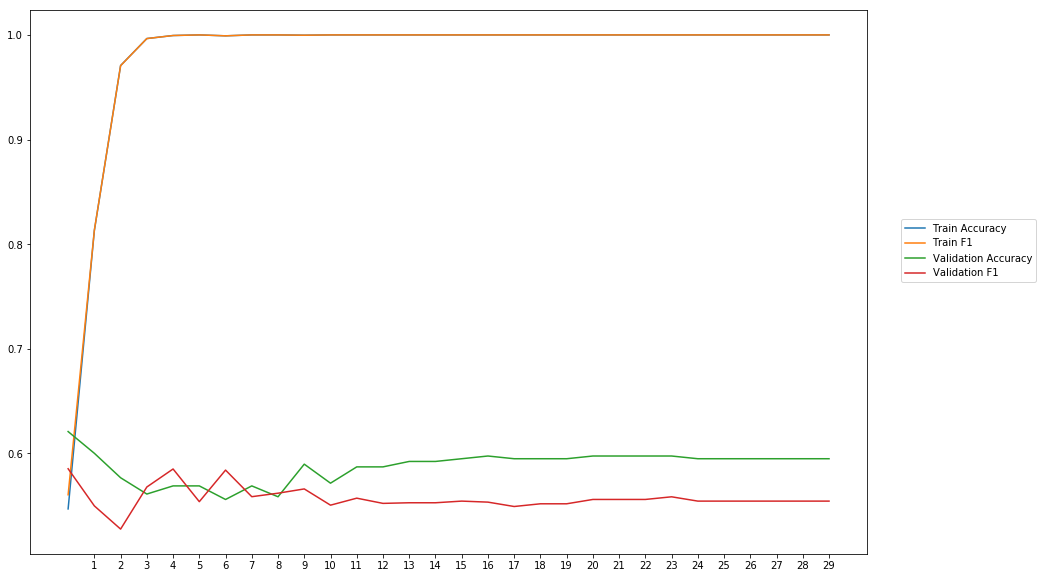

Average Accuracy: 58.78%
Average Precision: 60.21%
Average Recall: 52.08%
Average F1: 55.72%

-----Fold 2--------


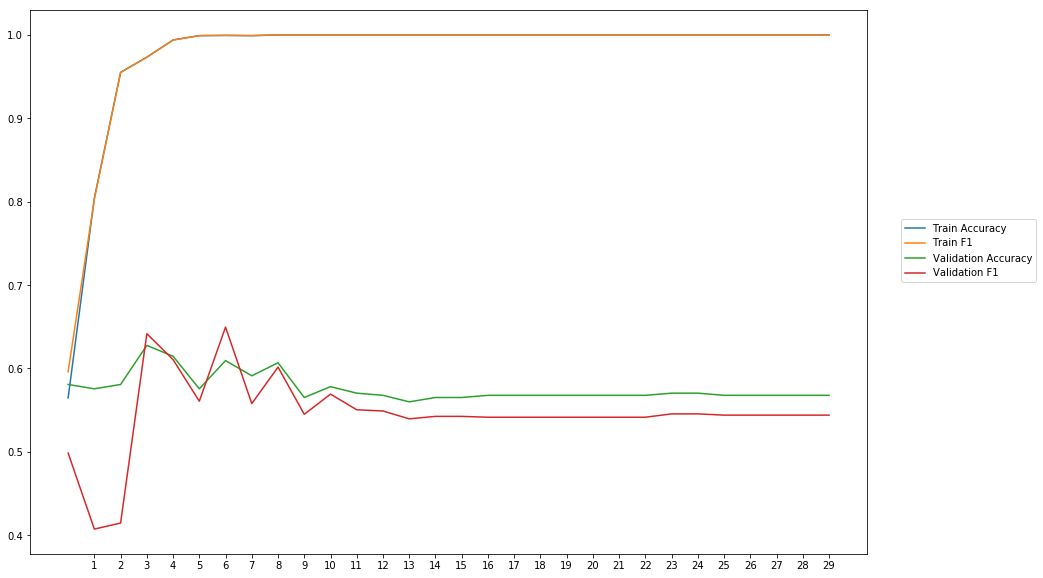

Average Accuracy: 57.62%
Average Precision: 58.60%
Average Recall: 51.97%
Average F1: 54.60%

-----Fold 3--------


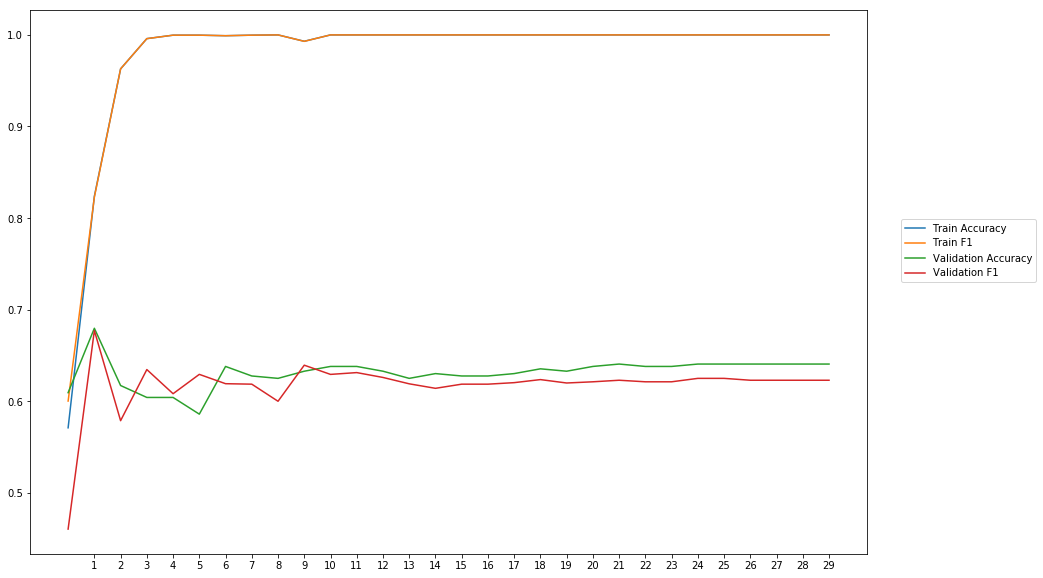

Average Accuracy: 63.13%
Average Precision: 64.01%
Average Recall: 60.16%
Average F1: 61.72%

-----Fold 4--------


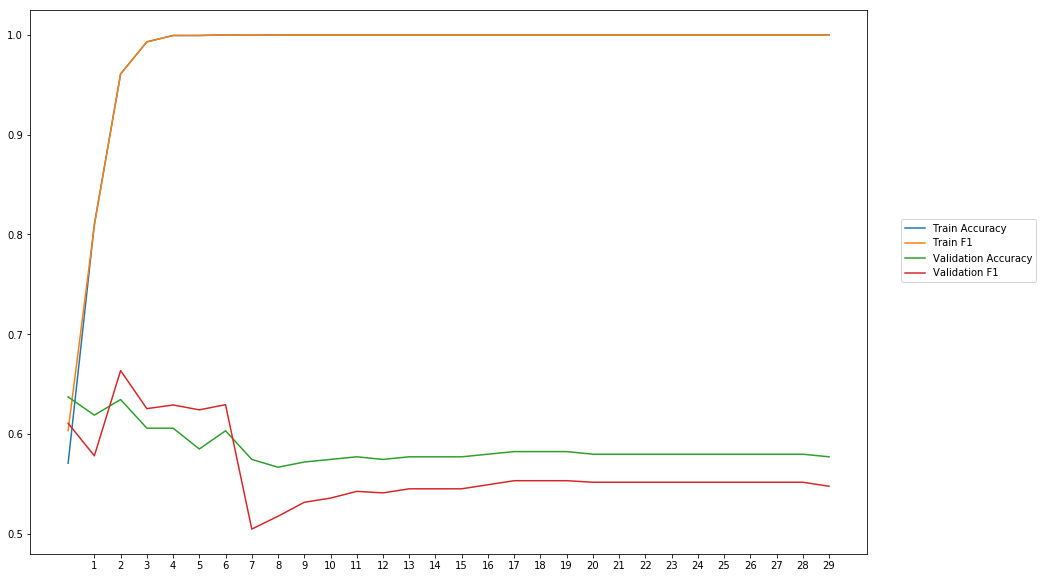

Average Accuracy: 58.60%
Average Precision: 59.38%
Average Recall: 53.89%
Average F1: 56.29%

-----Fold 5--------


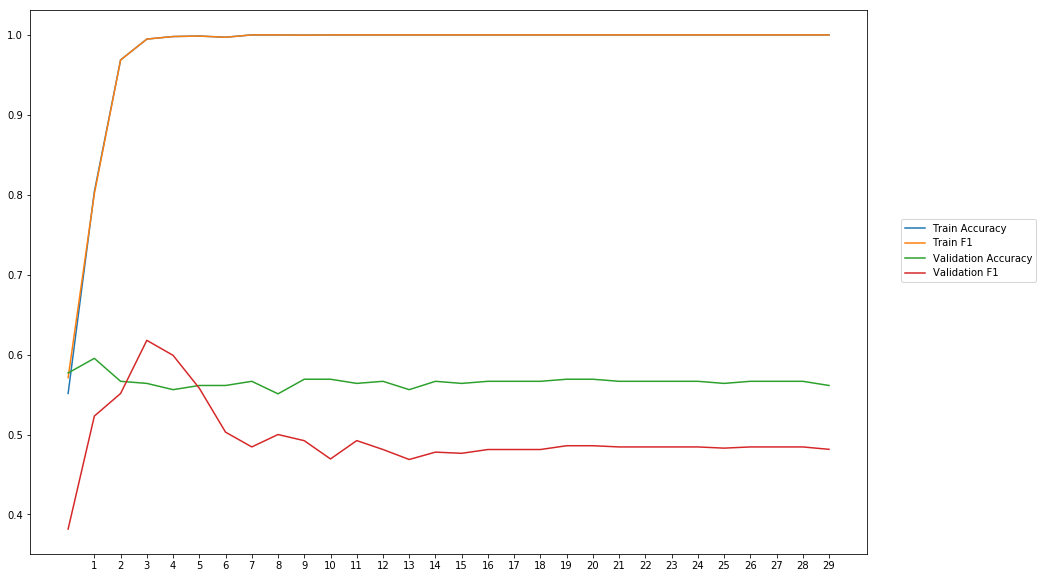

Average Accuracy: 56.61%
Average Precision: 59.33%
Average Recall: 43.30%
Average F1: 49.49%

-----Fold 6--------


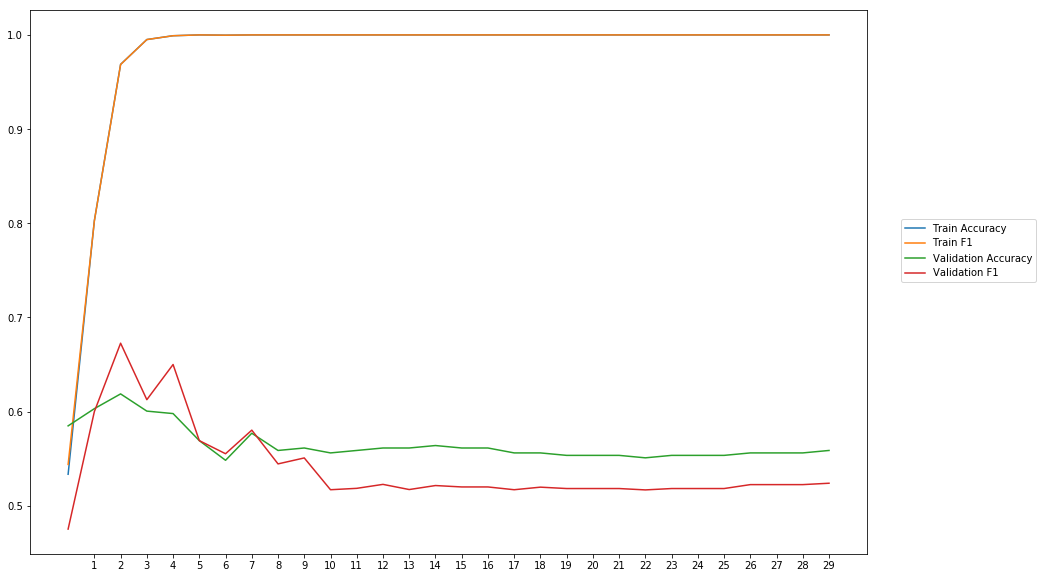

Average Accuracy: 56.52%
Average Precision: 57.08%
Average Recall: 51.82%
Average F1: 54.01%

-----Fold 7--------


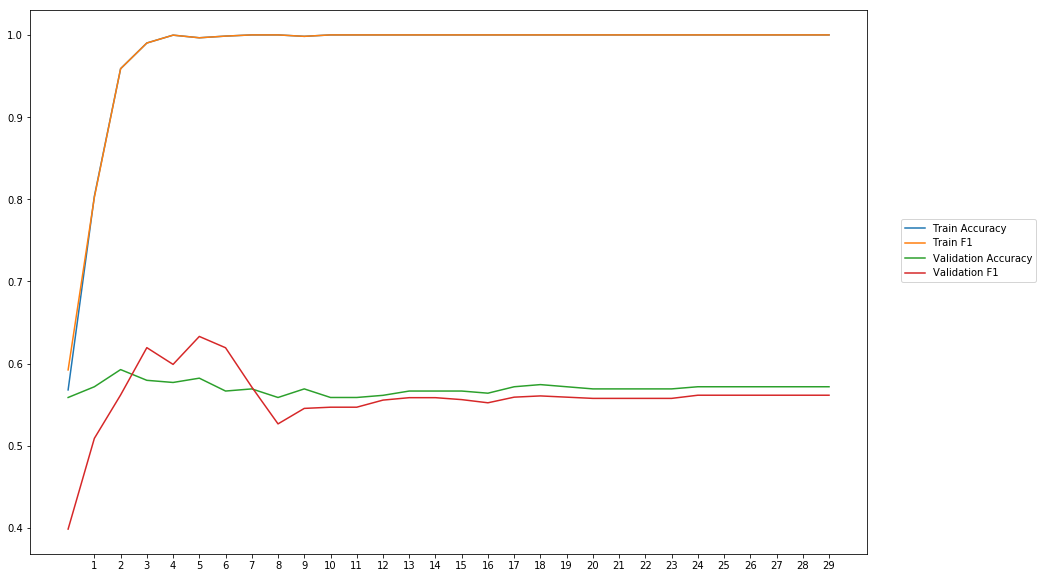

Average Accuracy: 56.98%
Average Precision: 57.29%
Average Recall: 55.03%
Average F1: 55.79%

-----Fold 8--------


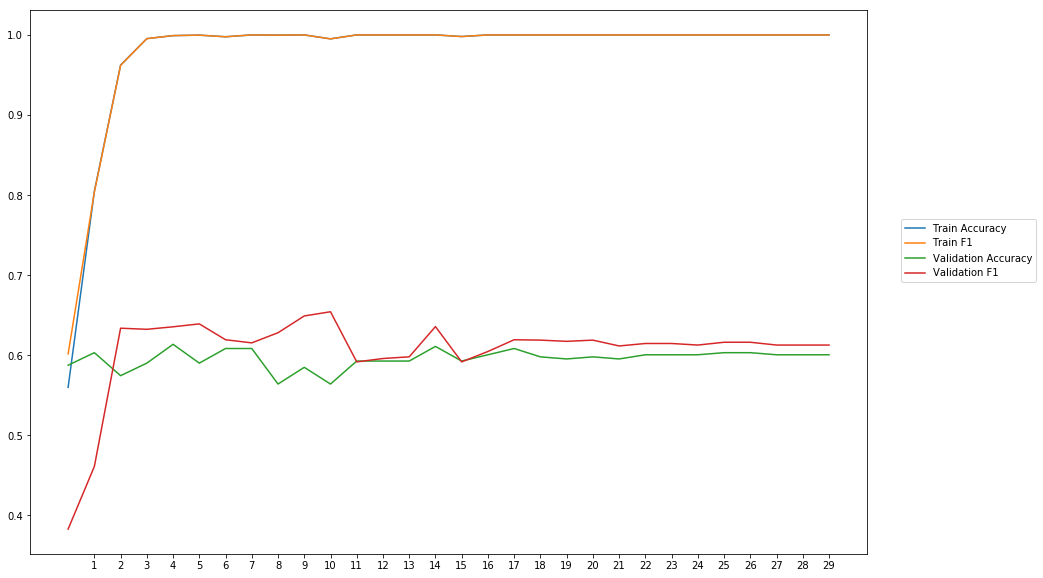

Average Accuracy: 59.58%
Average Precision: 59.55%
Average Recall: 63.54%
Average F1: 60.55%

-----Fold 9--------


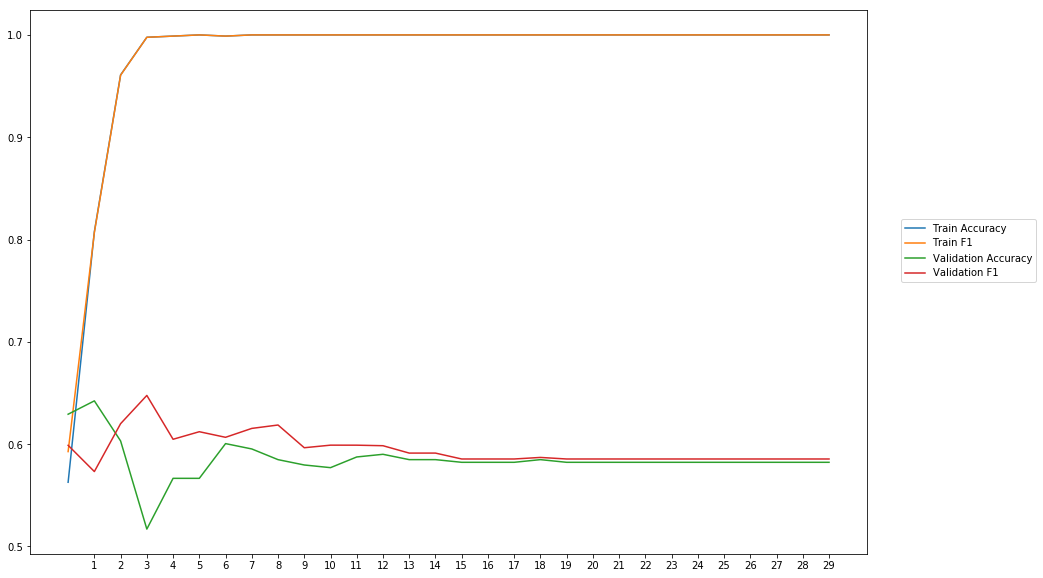

Average Accuracy: 58.49%
Average Precision: 58.28%
Average Recall: 61.45%
Average F1: 59.52%

-----Fold 10--------


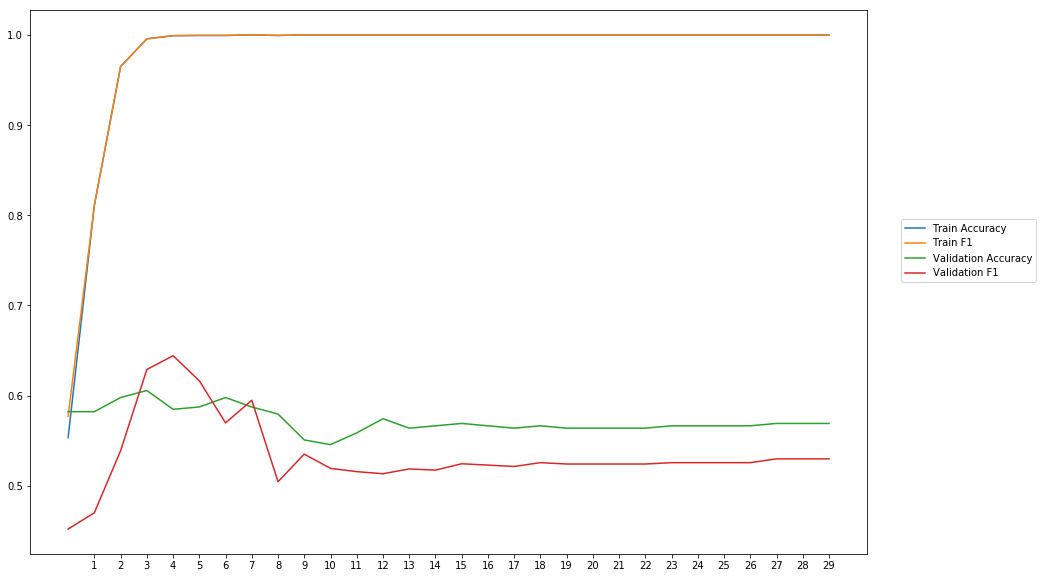

Average Accuracy: 57.21%
Average Precision: 58.54%
Average Recall: 49.81%
Average F1: 53.41%

-------Overallresults-------


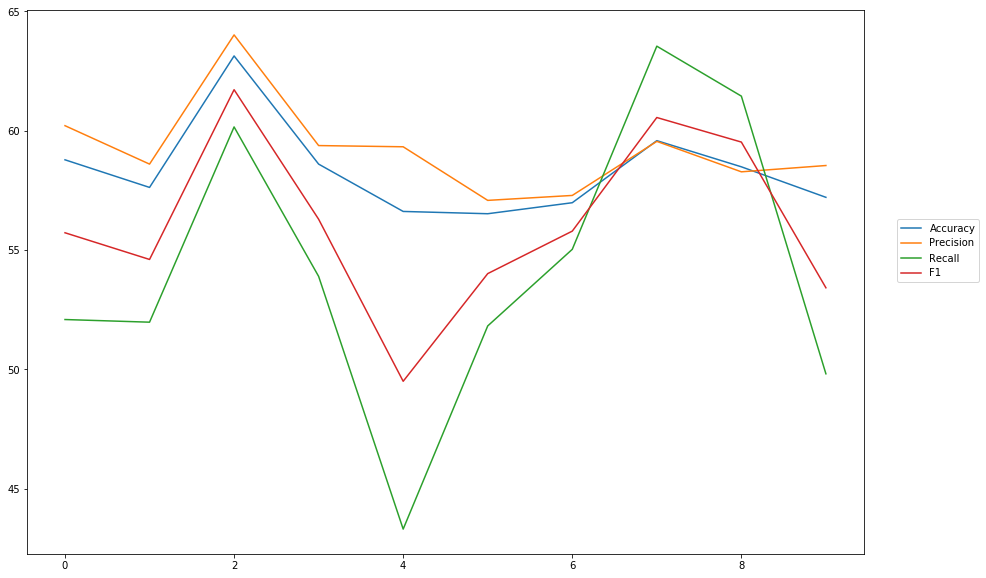

Accuracy: Mean = 58.35% (+/- 1.86%), Max = 63.13%, Min =  56.52%
Precision: Mean = 59.23% (+/- 1.85%), Max = 64.01%, Min =  57.08%
Recall: Mean = 54.30% (+/- 5.74%), Max = 63.54%, Min =  43.30%
F1: Mean = 56.11% (+/- 3.48%), Max = 61.72%, Min =  49.49%


In [9]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'combi_cnn_mlp')  

## Combination of MLP and CNN

In [10]:
wv_layer2 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences2 = wv_layer2(comment_input2)

#MLP
x2 = Dense(600, activation='relu') (embedded_sequences2)

#CNN
x2 = Conv1D(200, kernel_size =3, activation='relu')(x2)
x2 = MaxPooling1D(pool_size=2) (x2)
x2 = Flatten() (x2)

#Output Layer
preds2 = Dense(2, activation='softmax')(x2)

# build the model
model2 = Model(inputs=[comment_input2], outputs=preds2)


-----Fold 1--------


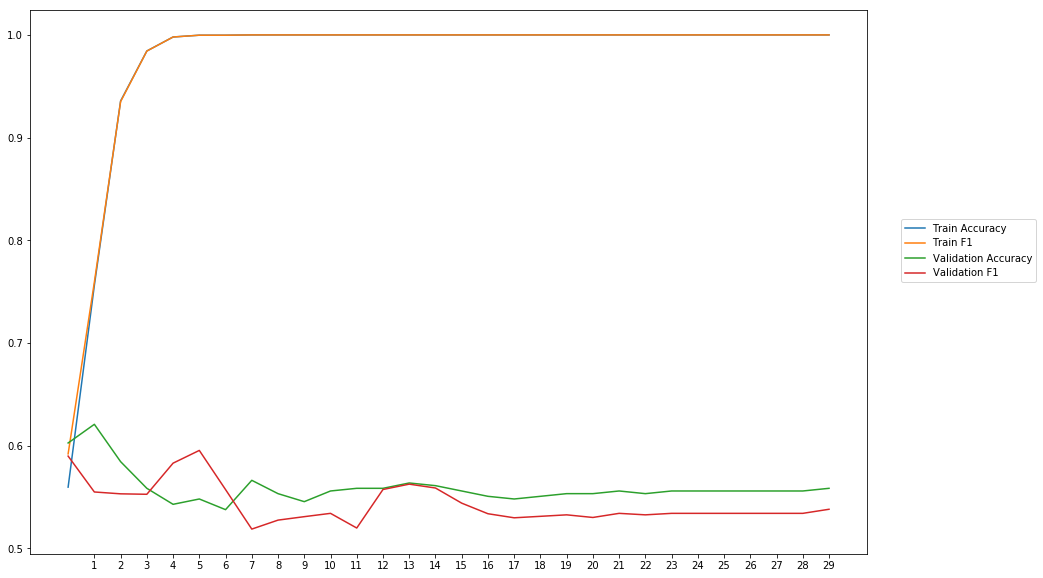

Average Accuracy: 55.90%
Average Precision: 56.33%
Average Recall: 52.78%
Average F1: 54.35%

-----Fold 2--------


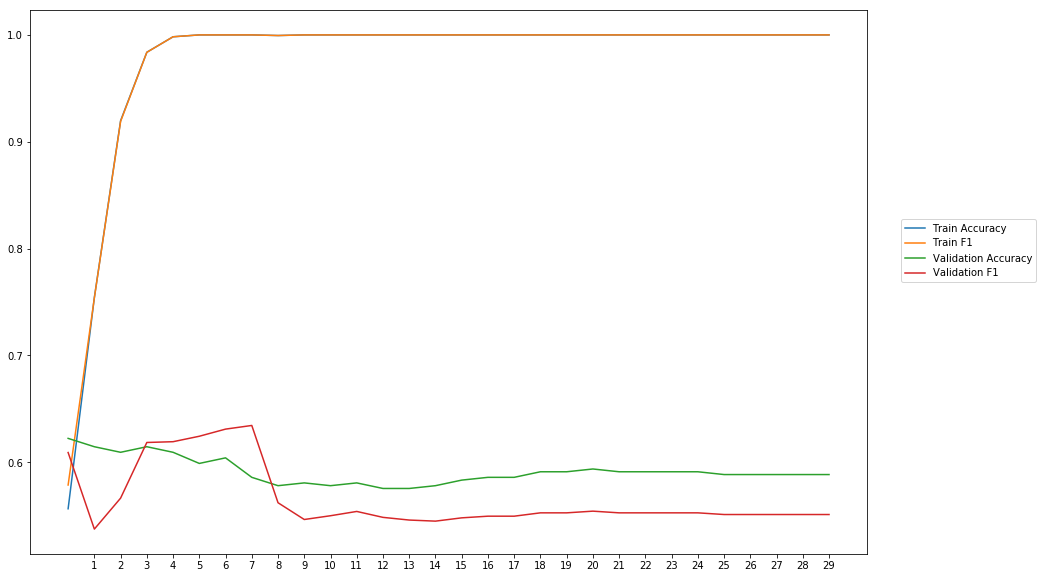

Average Accuracy: 59.15%
Average Precision: 60.09%
Average Recall: 53.82%
Average F1: 56.55%

-----Fold 3--------


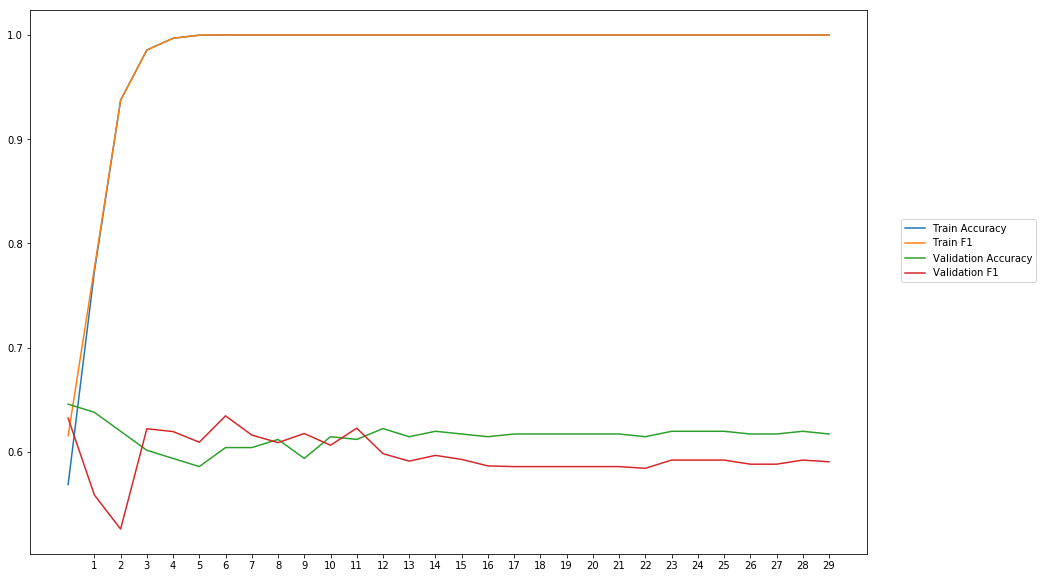

Average Accuracy: 61.48%
Average Precision: 62.59%
Average Recall: 57.50%
Average F1: 59.63%

-----Fold 4--------


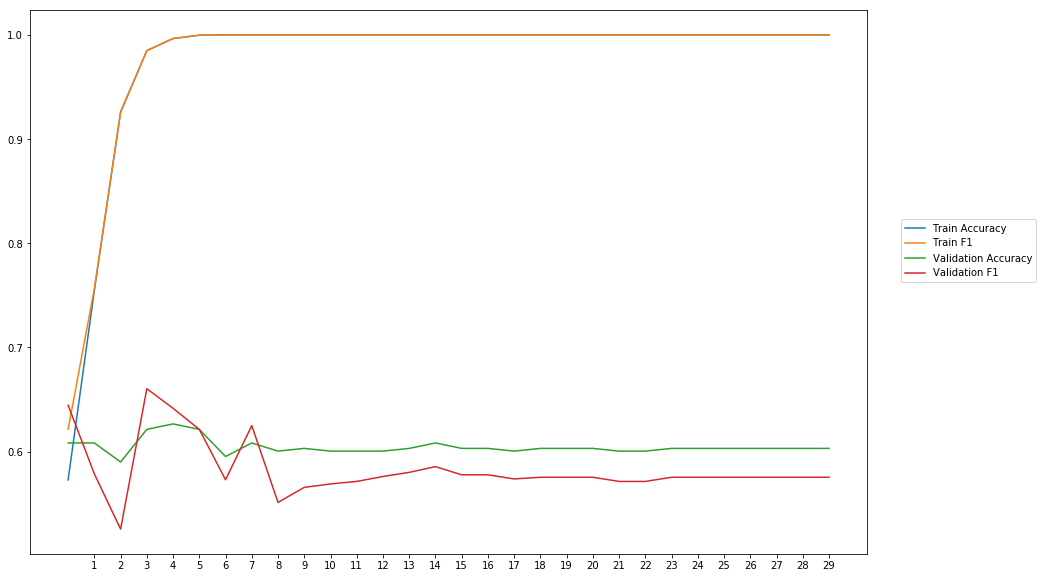

Average Accuracy: 60.45%
Average Precision: 61.45%
Average Recall: 55.83%
Average F1: 58.32%

-----Fold 5--------


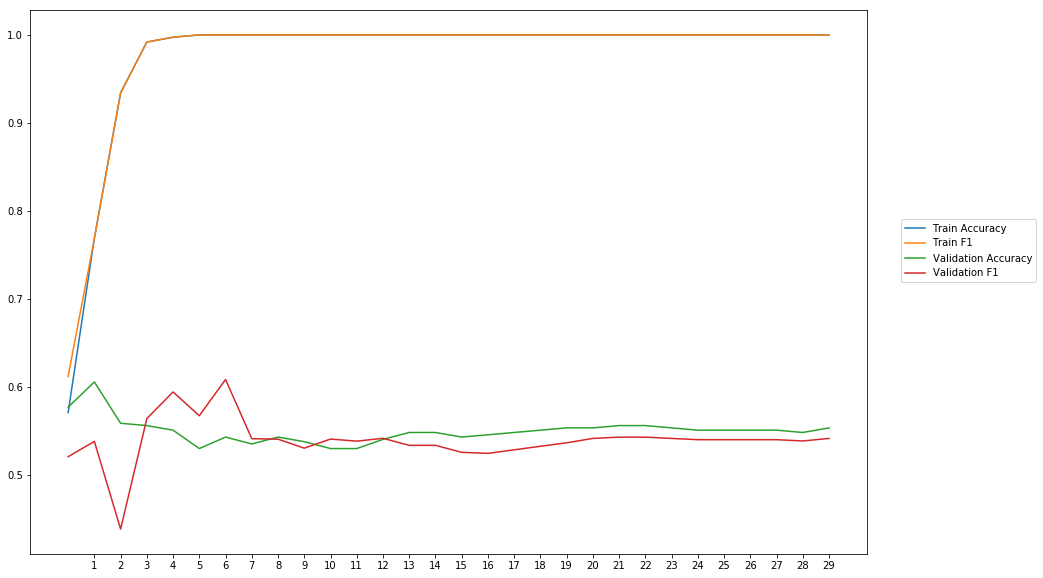

Average Accuracy: 55.00%
Average Precision: 55.31%
Average Recall: 53.23%
Average F1: 53.97%

-----Fold 6--------


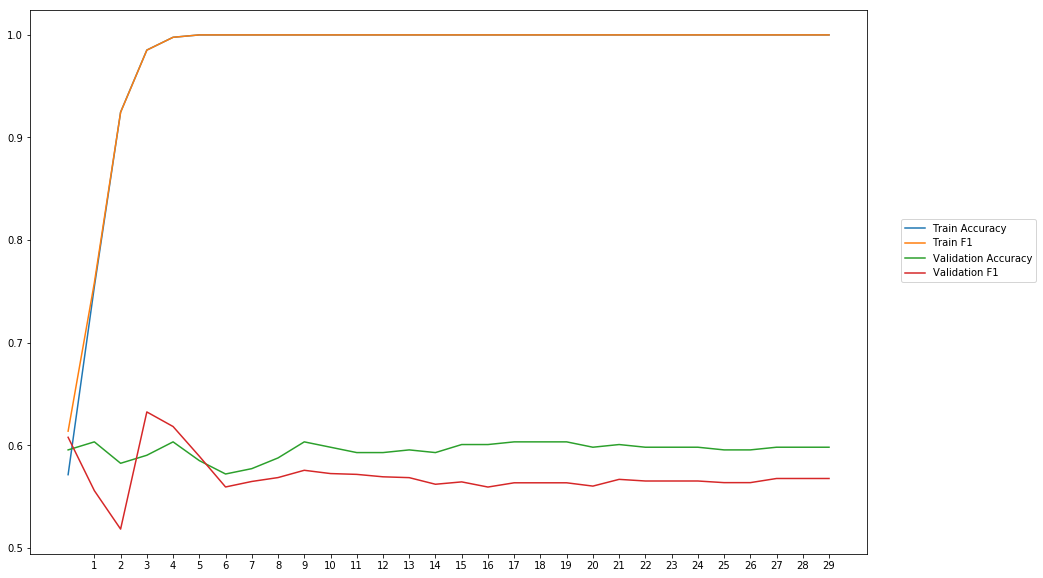

Average Accuracy: 59.52%
Average Precision: 60.70%
Average Recall: 53.96%
Average F1: 56.98%

-----Fold 7--------


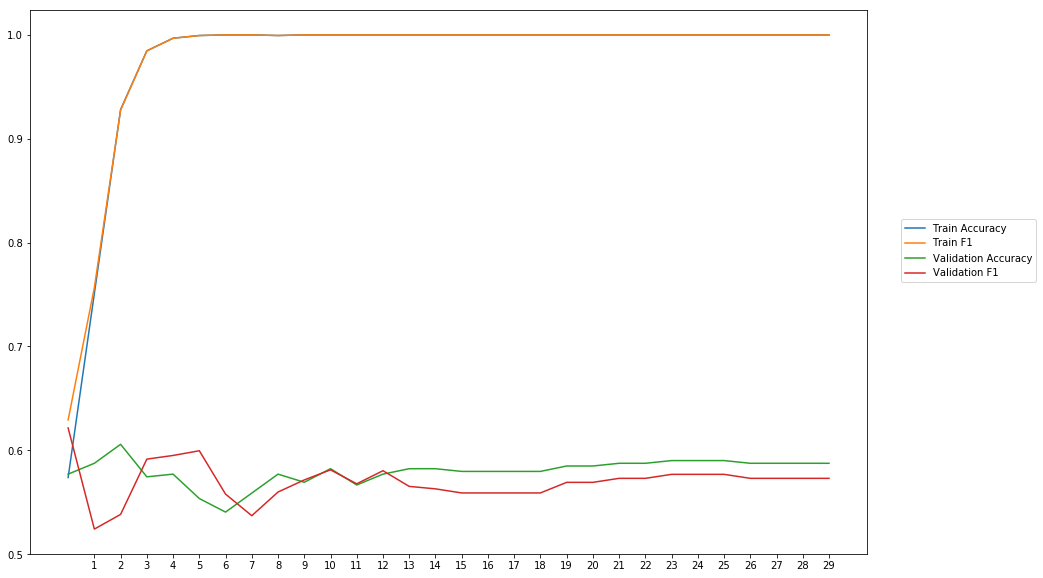

Average Accuracy: 57.98%
Average Precision: 58.37%
Average Recall: 56.00%
Average F1: 56.98%

-----Fold 8--------


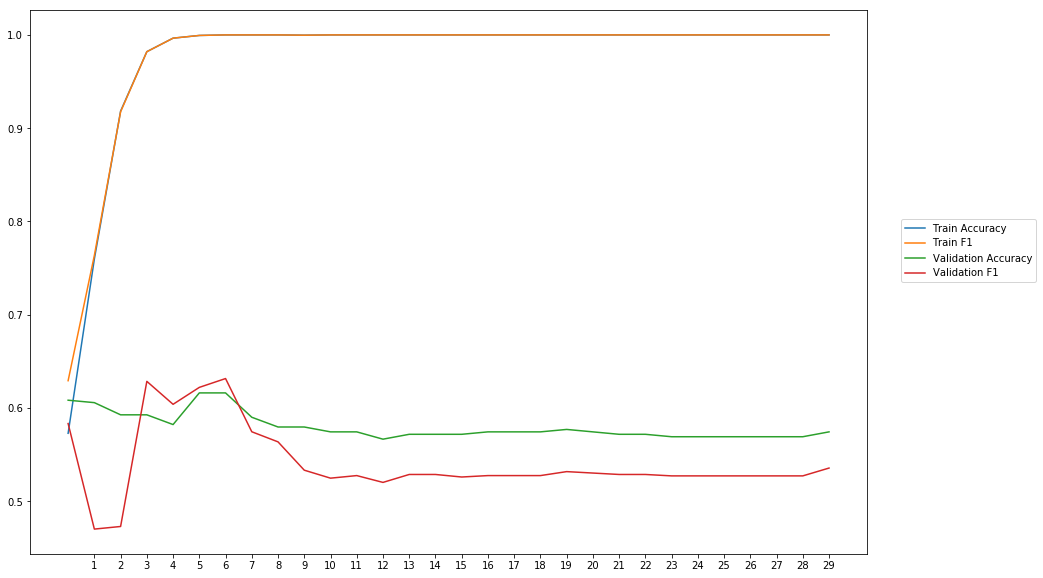

Average Accuracy: 58.01%
Average Precision: 59.59%
Average Recall: 50.23%
Average F1: 54.14%

-----Fold 9--------


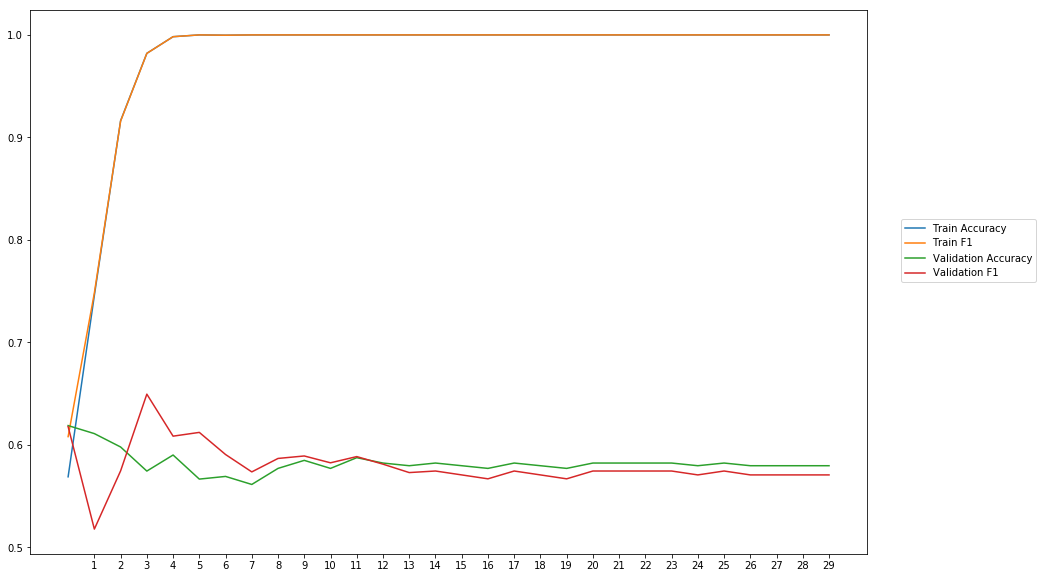

Average Accuracy: 58.22%
Average Precision: 58.32%
Average Recall: 58.10%
Average F1: 57.98%

-----Fold 10--------


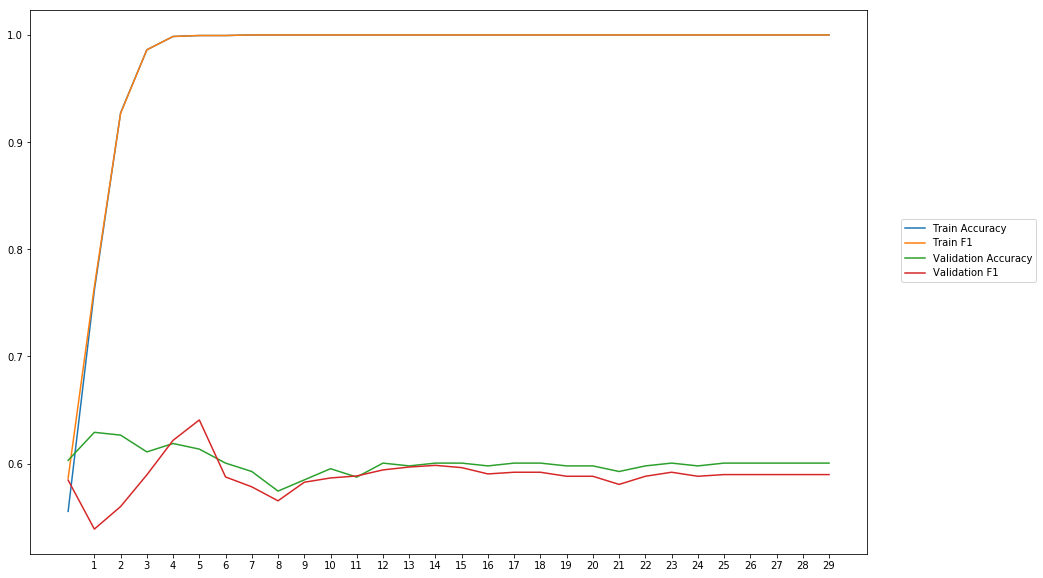

Average Accuracy: 60.08%
Average Precision: 60.72%
Average Recall: 57.43%
Average F1: 58.87%

-------Overallresults-------


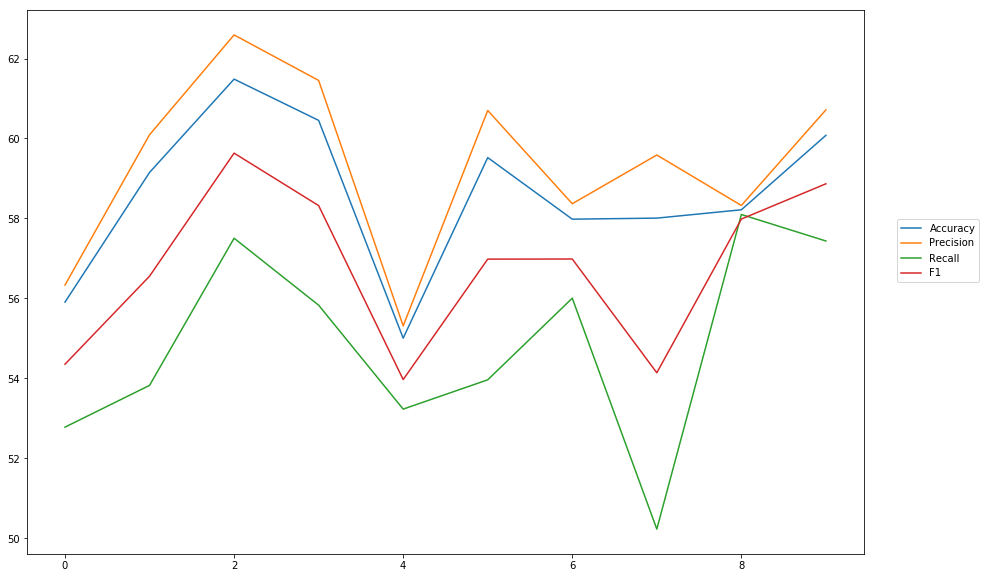

Accuracy: Mean = 58.58% (+/- 1.90%), Max = 61.48%, Min =  55.00%
Precision: Mean = 59.35% (+/- 2.16%), Max = 62.59%, Min =  55.31%
Recall: Mean = 54.89% (+/- 2.38%), Max = 58.10%, Min =  50.23%
F1: Mean = 56.78% (+/- 1.93%), Max = 59.63%, Min =  53.97%


In [11]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'combi_mlp_cnn')  

## Parallel MLP and CNN, concatenate the results

#### without Pooling

In [12]:
wv_layer4 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences4 = wv_layer4(comment_input4)

#MLP
mlp = Dense(600, activation='relu') (embedded_sequences4)

#CNN
cnn = Conv1D(200, kernel_size =1, activation='relu')(embedded_sequences4)

#Concatenate MLP and CNN
concat = concatenate([mlp, cnn])
concat = Flatten()(concat)

#Output Layer
preds4 = Dense(2, activation='softmax')(concat)

# build the model
model4 = Model(inputs=[comment_input4], outputs=preds4)


-----Fold 1--------


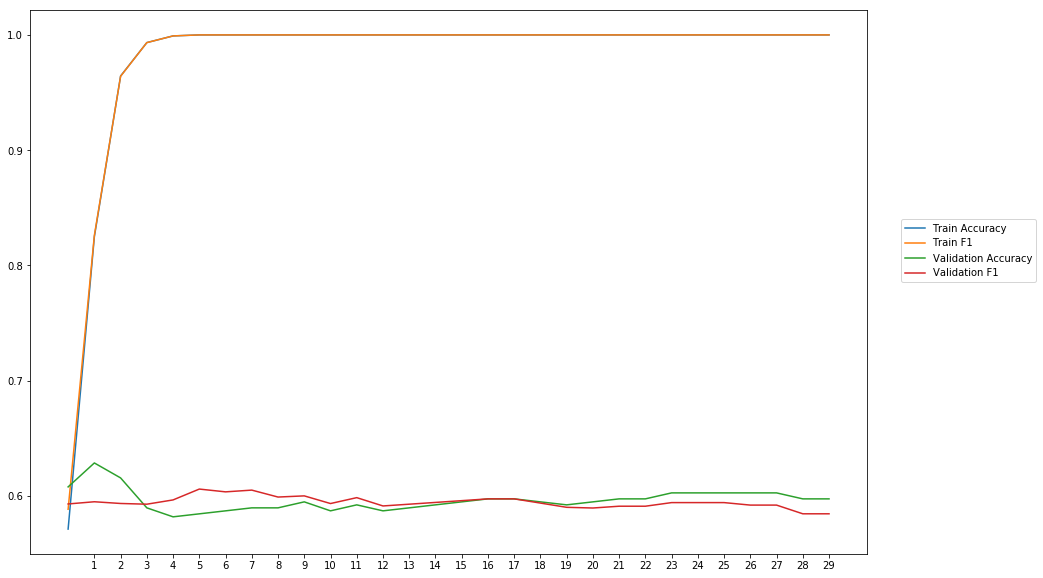

Average Accuracy: 59.64%
Average Precision: 59.65%
Average Recall: 59.36%
Average F1: 59.45%

-----Fold 2--------


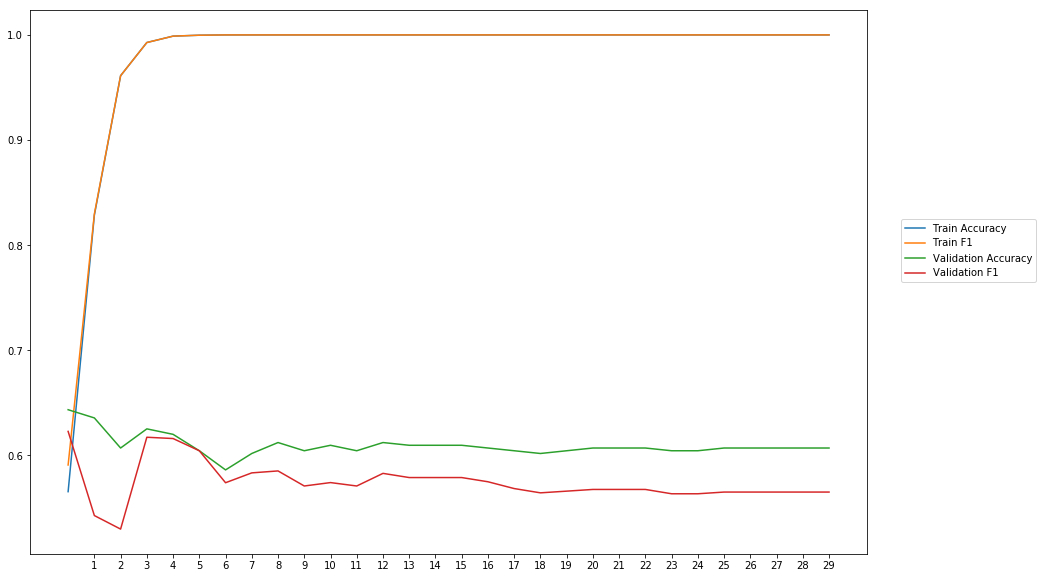

Average Accuracy: 60.90%
Average Precision: 62.73%
Average Recall: 53.19%
Average F1: 57.44%

-----Fold 3--------


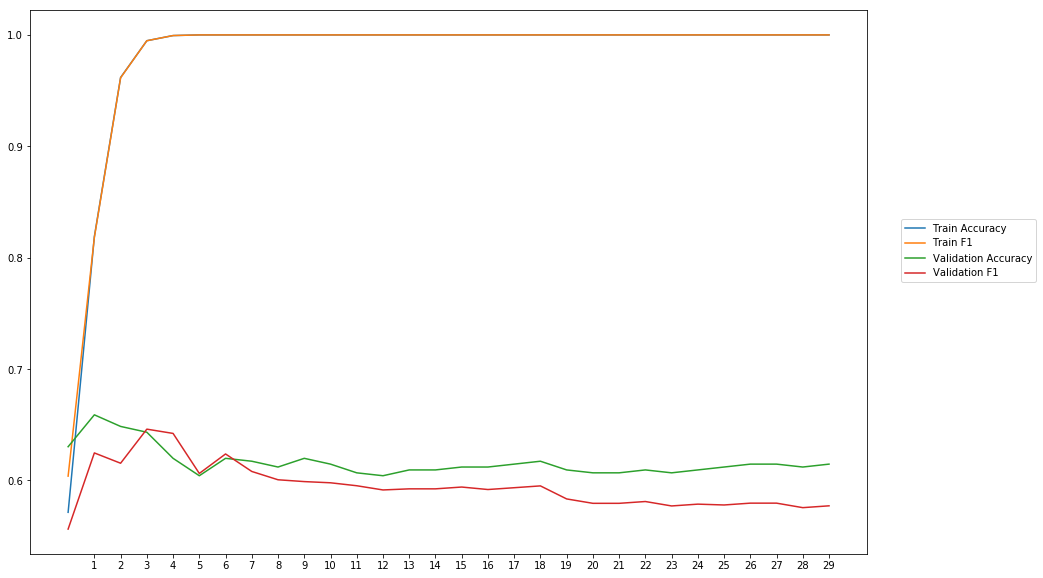

Average Accuracy: 61.63%
Average Precision: 62.76%
Average Recall: 56.68%
Average F1: 59.45%

-----Fold 4--------


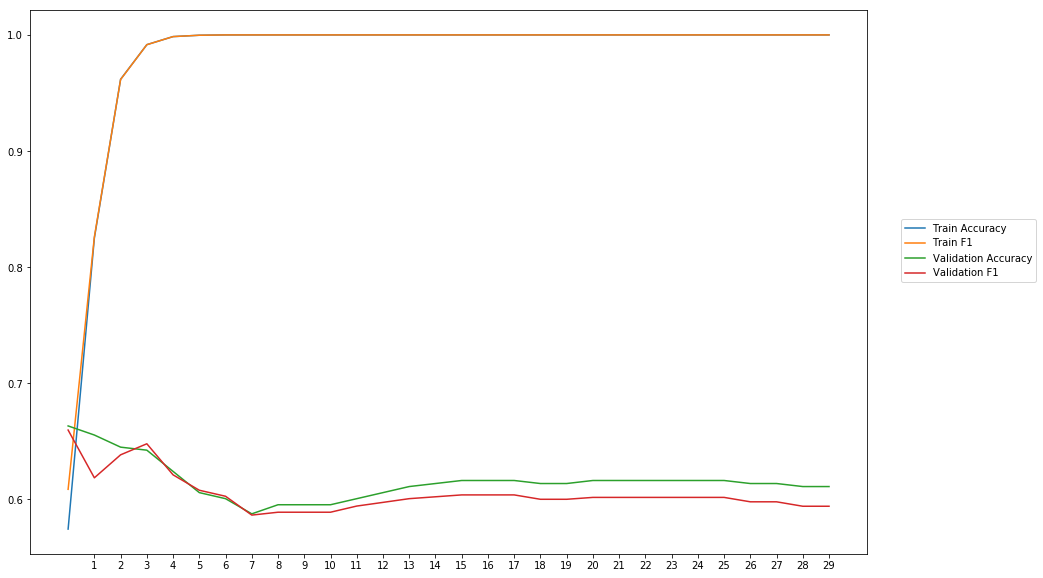

Average Accuracy: 61.54%
Average Precision: 62.06%
Average Recall: 59.06%
Average F1: 60.49%

-----Fold 5--------


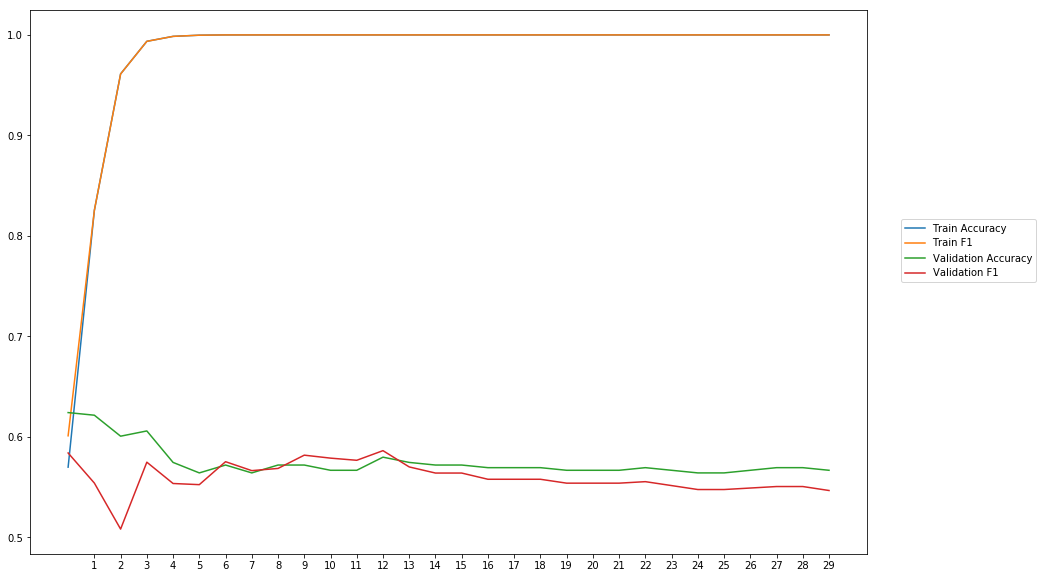

Average Accuracy: 57.48%
Average Precision: 58.09%
Average Recall: 54.28%
Average F1: 55.96%

-----Fold 6--------


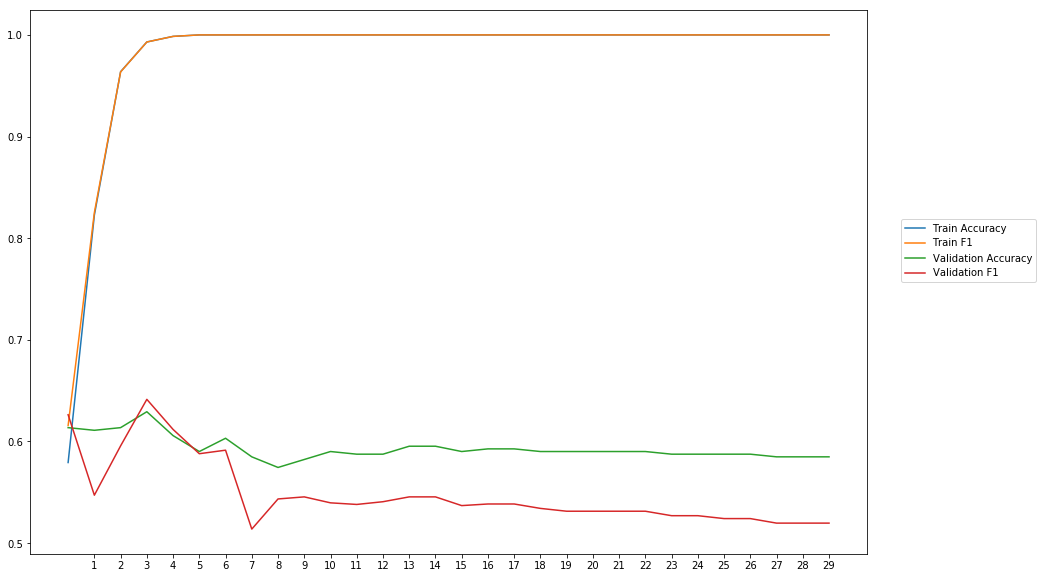

Average Accuracy: 59.31%
Average Precision: 61.39%
Average Recall: 49.88%
Average F1: 54.83%

-----Fold 7--------


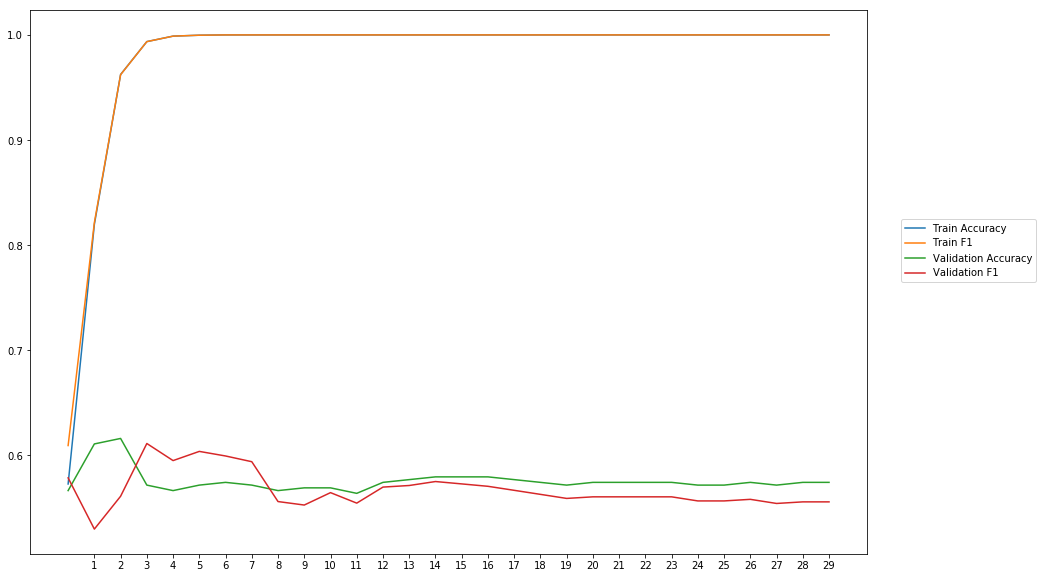

Average Accuracy: 57.56%
Average Precision: 57.87%
Average Recall: 56.07%
Average F1: 56.77%

-----Fold 8--------


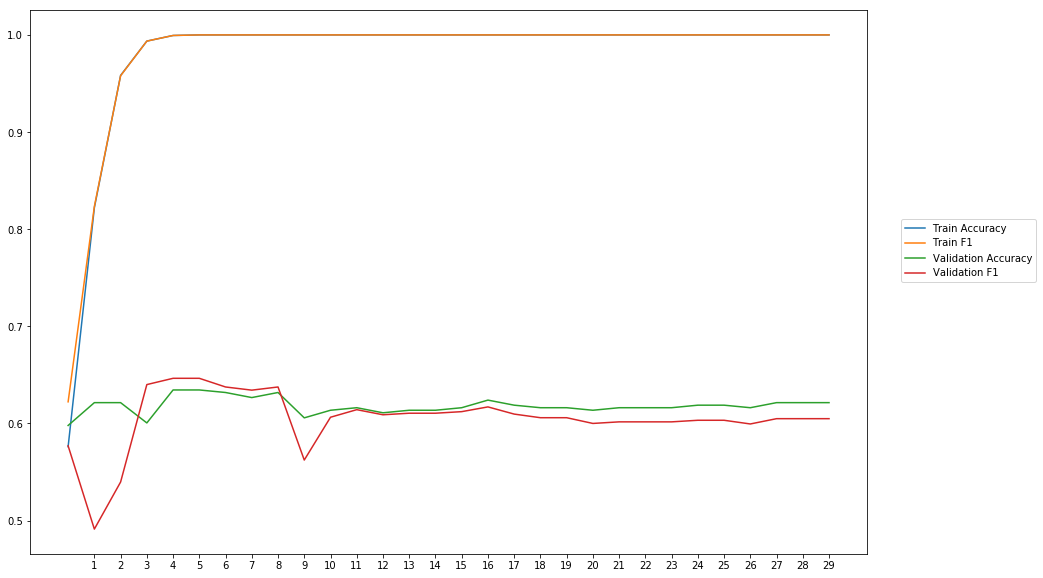

Average Accuracy: 61.82%
Average Precision: 62.70%
Average Recall: 59.01%
Average F1: 60.46%

-----Fold 9--------


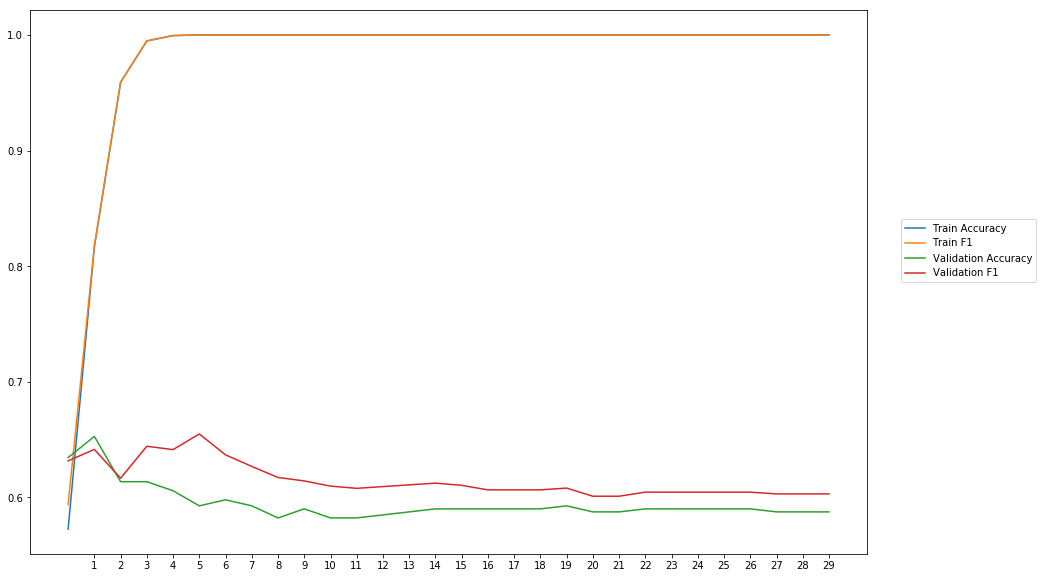

Average Accuracy: 59.48%
Average Precision: 58.51%
Average Recall: 64.94%
Average F1: 61.49%

-----Fold 10--------


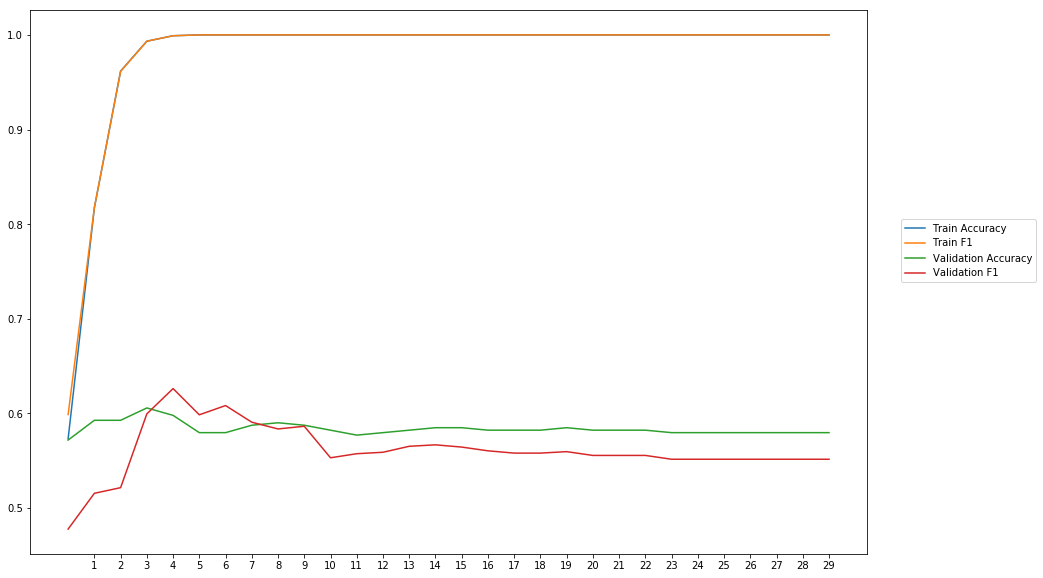

Average Accuracy: 58.37%
Average Precision: 59.21%
Average Recall: 53.72%
Average F1: 56.12%

-------Overallresults-------


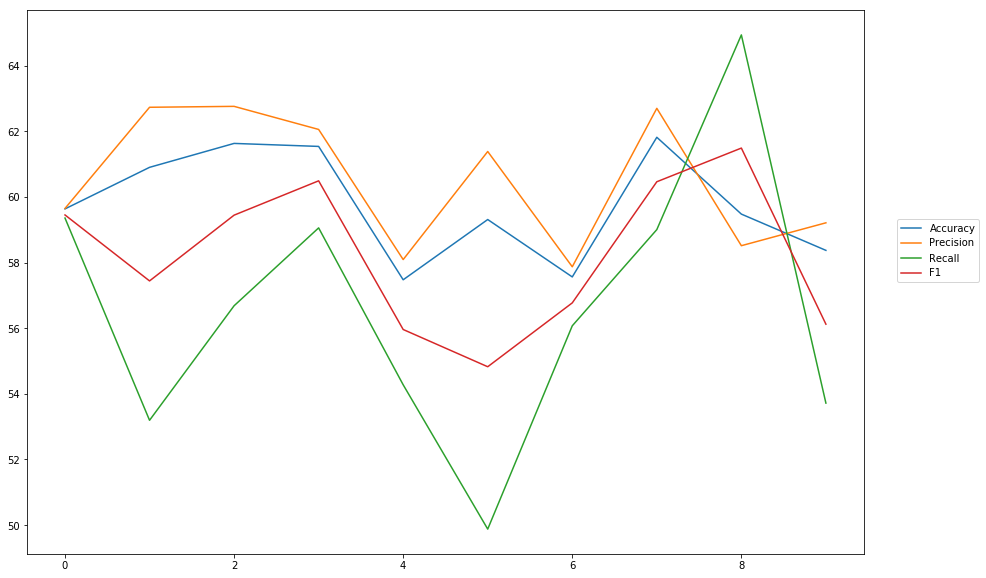

Accuracy: Mean = 59.77% (+/- 1.56%), Max = 61.82%, Min =  57.48%
Precision: Mean = 60.50% (+/- 1.93%), Max = 62.76%, Min =  57.87%
Recall: Mean = 56.62% (+/- 4.00%), Max = 64.94%, Min =  49.88%
F1: Mean = 58.25% (+/- 2.18%), Max = 61.49%, Min =  54.83%


In [13]:
cross_val(model4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'combi_mlp_cnn_parallel_withoutpooling')  

#### with Pooling

In [14]:
wv_layer5 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences5 = wv_layer5(comment_input5)

#MLP
mlp = Dense(600, activation='relu') (embedded_sequences5)
mlp = MaxPooling1D(pool_size=2) (mlp)

#CNN
cnn = Conv1D(200, kernel_size =1, activation='relu')(embedded_sequences5)
cnn = MaxPooling1D(pool_size=2) (cnn)

#Concatenate MLP and CNN
concat = concatenate([mlp, cnn])
concat = Flatten()(concat)

#Output Layer
preds5 = Dense(2, activation='softmax')(concat)

# build the model
model5 = Model(inputs=[comment_input5], outputs=preds5)


-----Fold 1--------


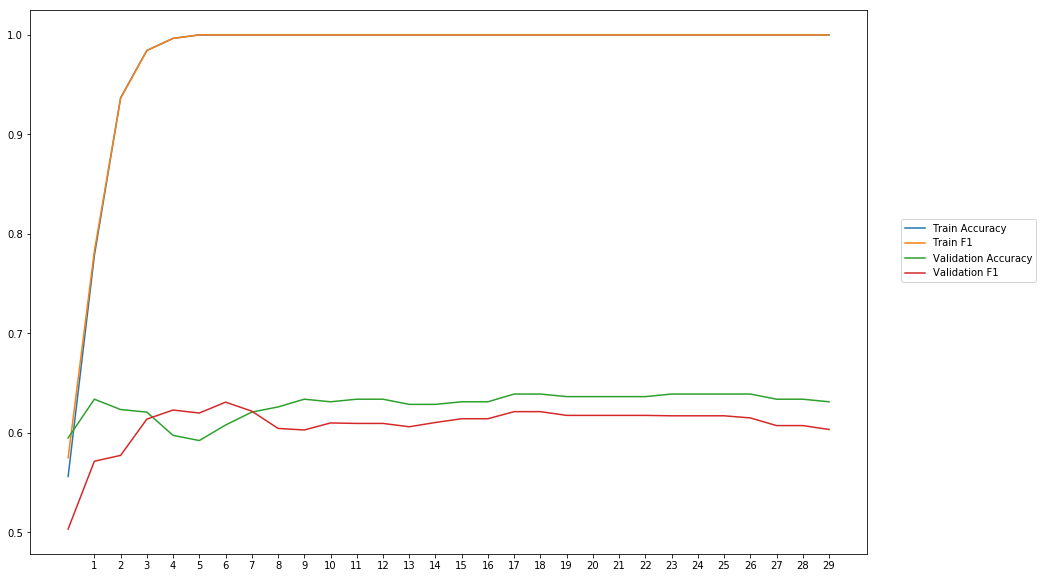

Average Accuracy: 62.82%
Average Precision: 64.26%
Average Recall: 58.02%
Average F1: 60.79%

-----Fold 2--------


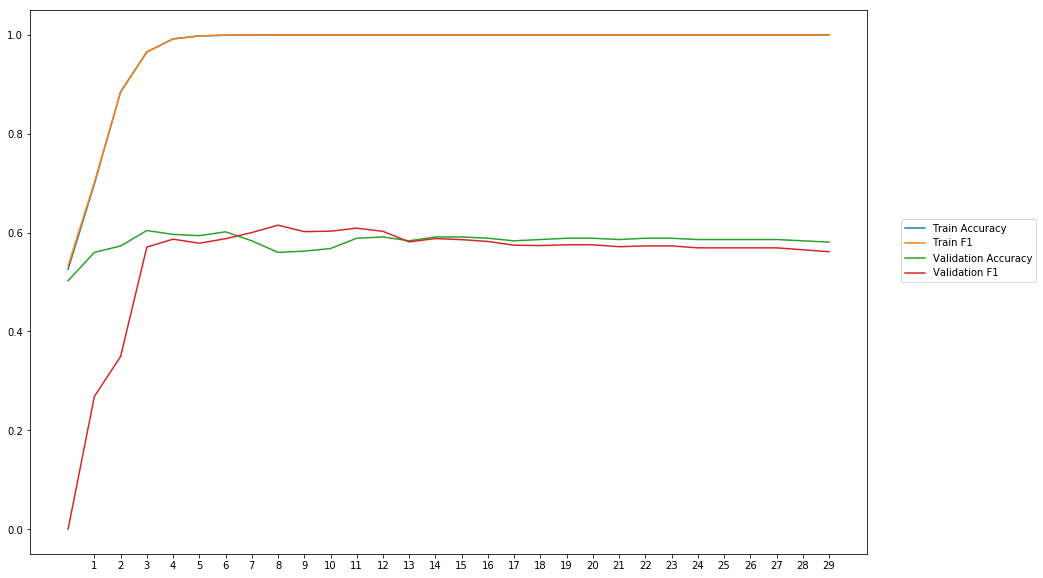

Average Accuracy: 58.19%
Average Precision: 57.70%
Average Recall: 53.58%
Average F1: 54.43%

-----Fold 3--------


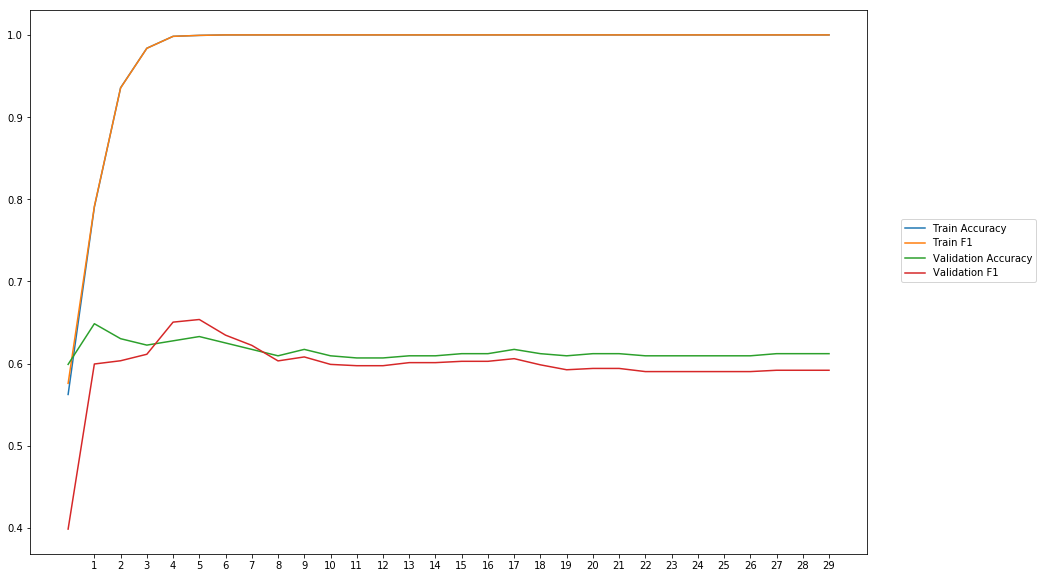

Average Accuracy: 61.47%
Average Precision: 62.50%
Average Recall: 57.89%
Average F1: 59.65%

-----Fold 4--------


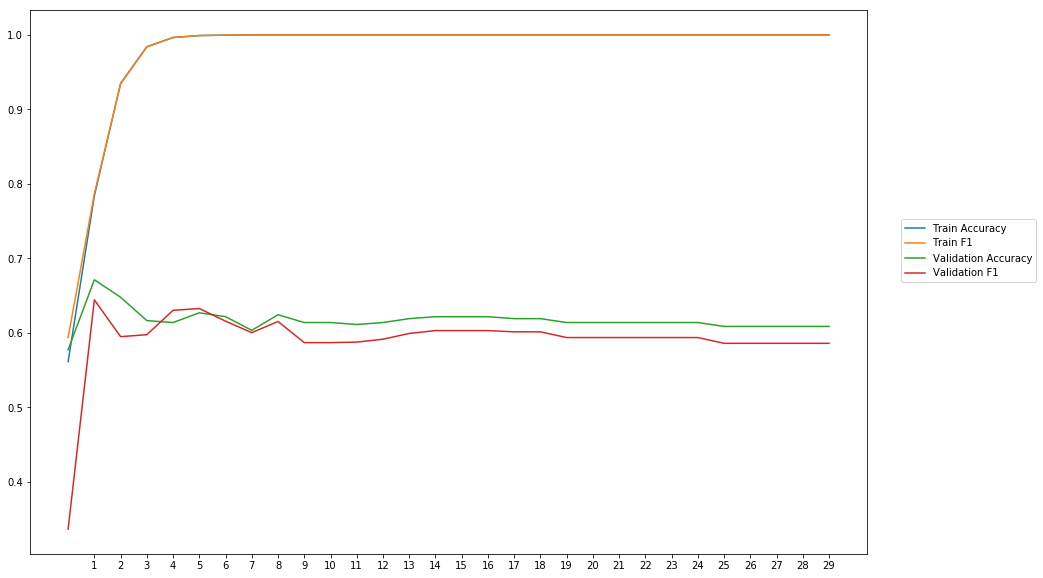

Average Accuracy: 61.65%
Average Precision: 63.37%
Average Recall: 56.14%
Average F1: 59.05%

-----Fold 5--------


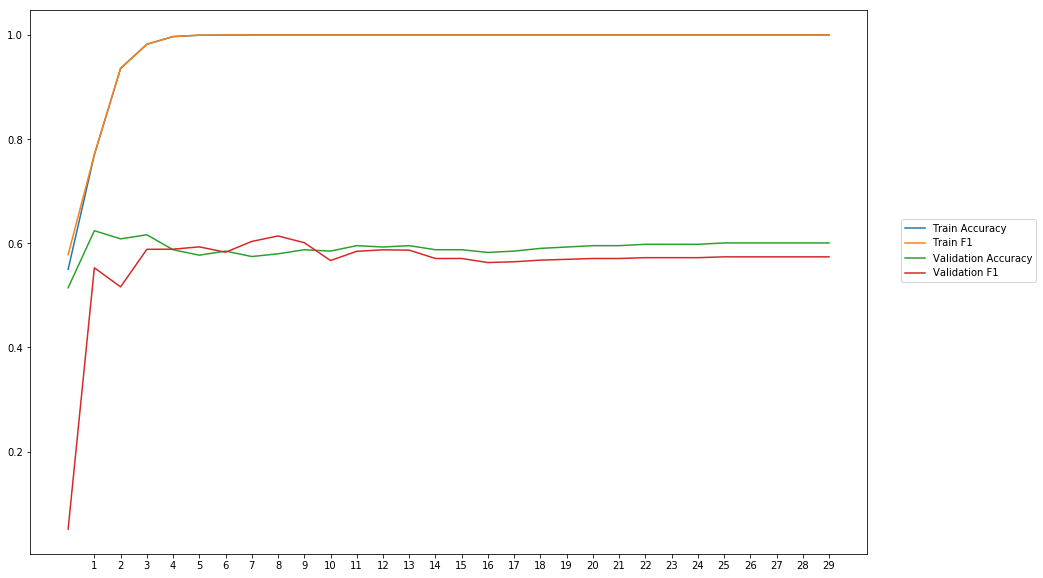

Average Accuracy: 59.11%
Average Precision: 61.63%
Average Recall: 53.72%
Average F1: 55.83%

-----Fold 6--------


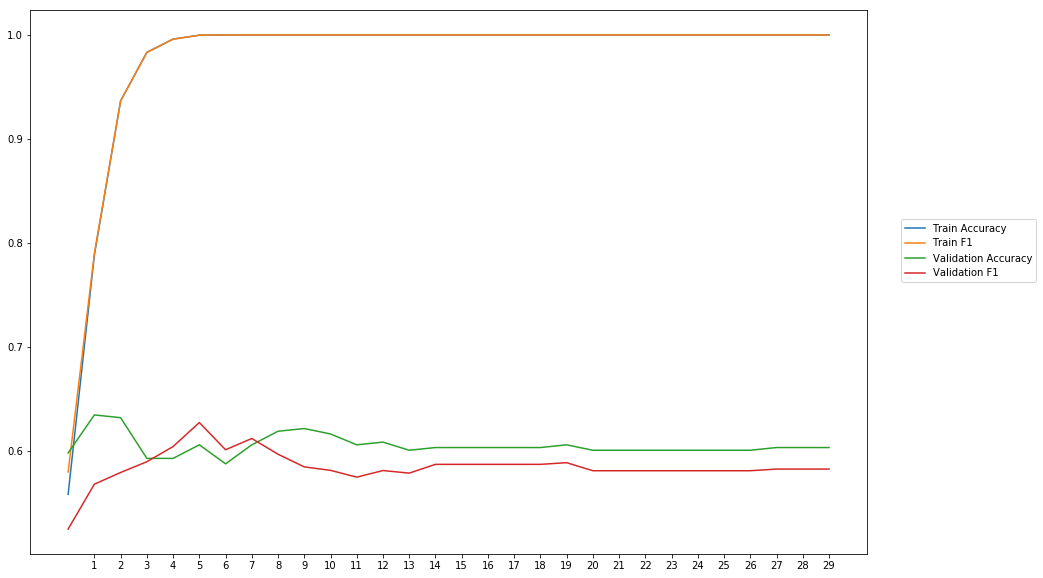

Average Accuracy: 60.51%
Average Precision: 61.65%
Average Recall: 55.86%
Average F1: 58.46%

-----Fold 7--------


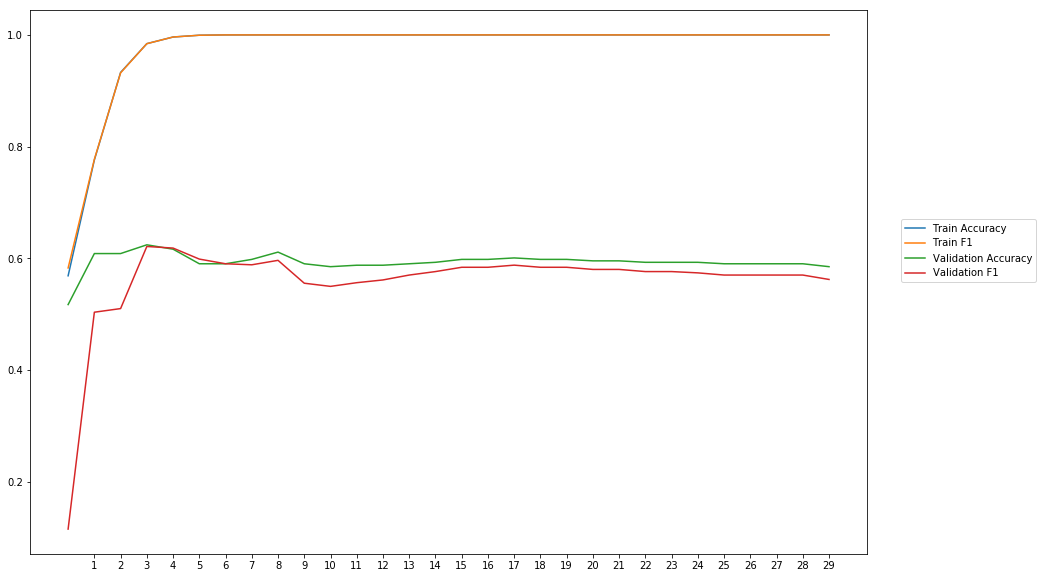

Average Accuracy: 59.34%
Average Precision: 60.87%
Average Recall: 53.19%
Average F1: 55.86%

-----Fold 8--------


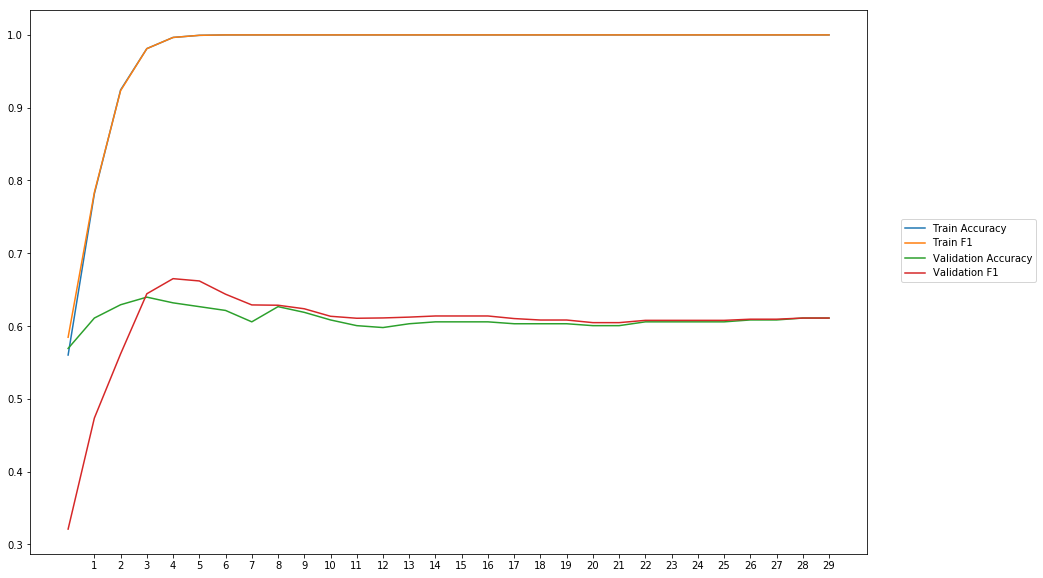

Average Accuracy: 60.93%
Average Precision: 61.55%
Average Recall: 60.52%
Average F1: 60.16%

-----Fold 9--------


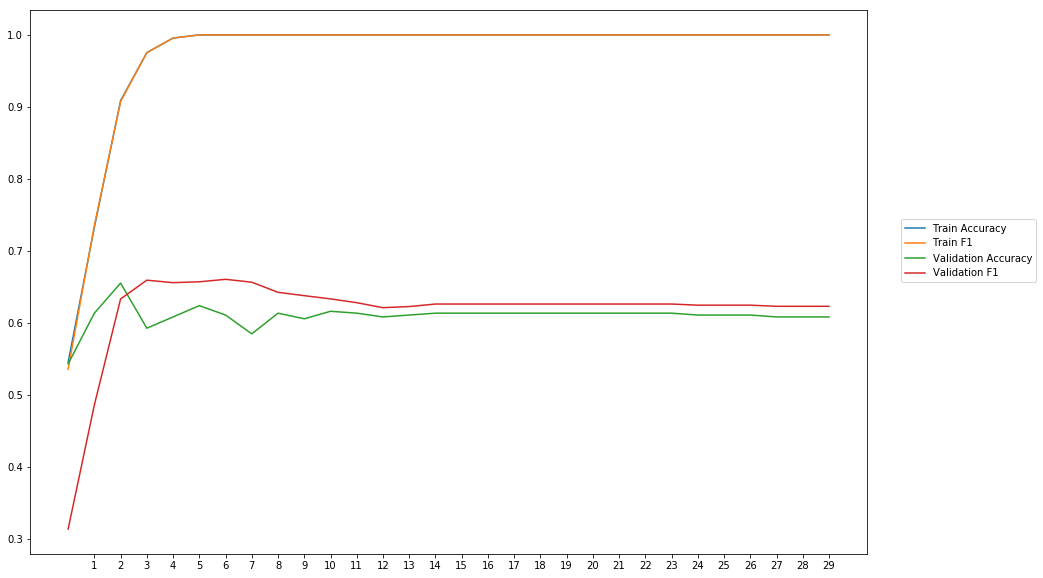

Average Accuracy: 60.98%
Average Precision: 60.55%
Average Recall: 64.59%
Average F1: 61.72%

-----Fold 10--------


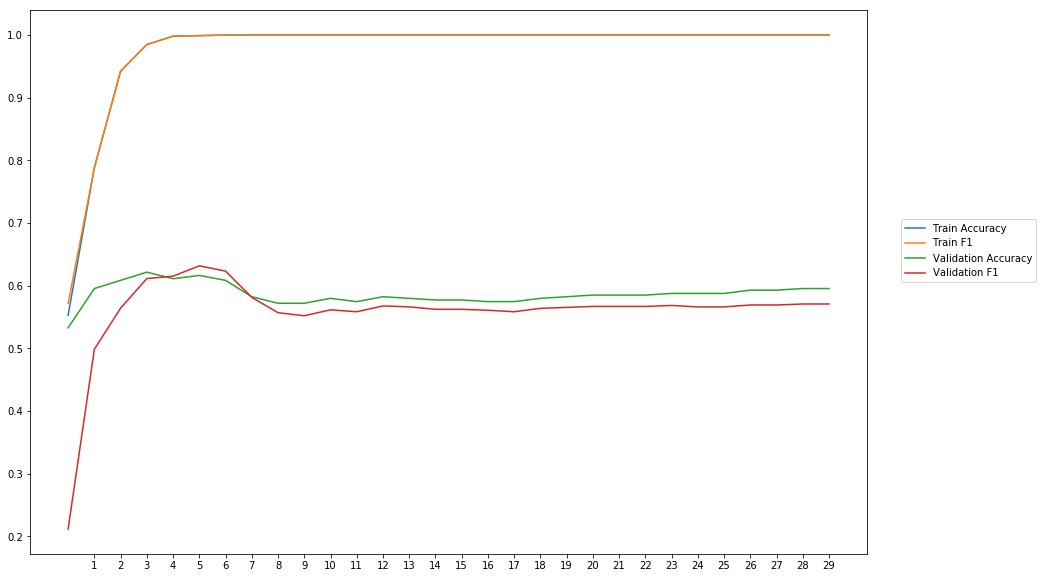

Average Accuracy: 58.64%
Average Precision: 59.75%
Average Recall: 53.56%
Average F1: 55.83%

-------Overallresults-------


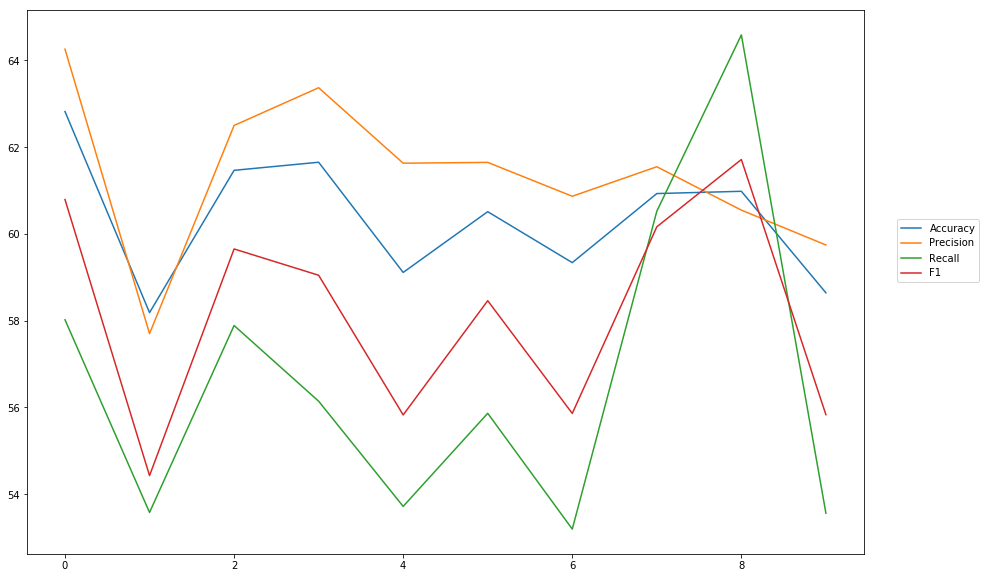

Accuracy: Mean = 60.37% (+/- 1.41%), Max = 62.82%, Min =  58.19%
Precision: Mean = 61.38% (+/- 1.76%), Max = 64.26%, Min =  57.70%
Recall: Mean = 56.71% (+/- 3.49%), Max = 64.59%, Min =  53.19%
F1: Mean = 58.18% (+/- 2.38%), Max = 61.72%, Min =  54.43%


In [15]:
cross_val(model5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'combi_mlp_cnn_parallel_withpooling')  

## MLP model as layer in CNN

In [8]:
# MLP model
comment_input_mlp = Input(shape=(64,3800), dtype='float32')
mlp = Dense(600, activation='relu') (comment_input_mlp)
preds_mlp =  Dense(2, activation='softmax')(mlp) 

mlp_model = Model(comment_input_mlp, preds_mlp)

#CNN model, take MLP as Layer
wv_layer6 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

comment_input6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences6 = wv_layer6(comment_input6)

cnn = Conv1D(200, kernel_size =3, activation='relu')(embedded_sequences6)
cnn = MaxPooling1D(pool_size=2) (cnn)
cnn = Flatten() (cnn)
preds6 = mlp_model(cnn)

# build the model
model6 = Model(inputs=[comment_input6], outputs=preds6)
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 40)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 40, 300)           4118700   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 38, 200)           180200    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 19, 200)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3800)              0         
_________________________________________________________________
model_1 (Model)              multiple                  2281802   
Total params: 6,580,702
Trainable params: 6,580,702
Non-trainable params: 0
_________________________________________________________________



-----Fold 1--------


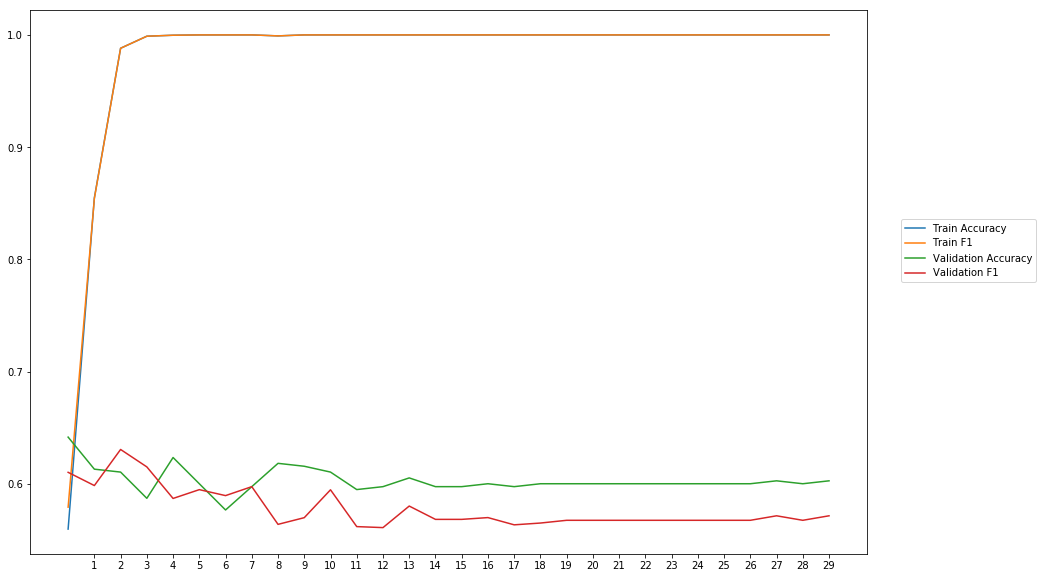

Average Accuracy: 60.29%
Average Precision: 61.60%
Average Recall: 54.65%
Average F1: 57.79%

-----Fold 2--------


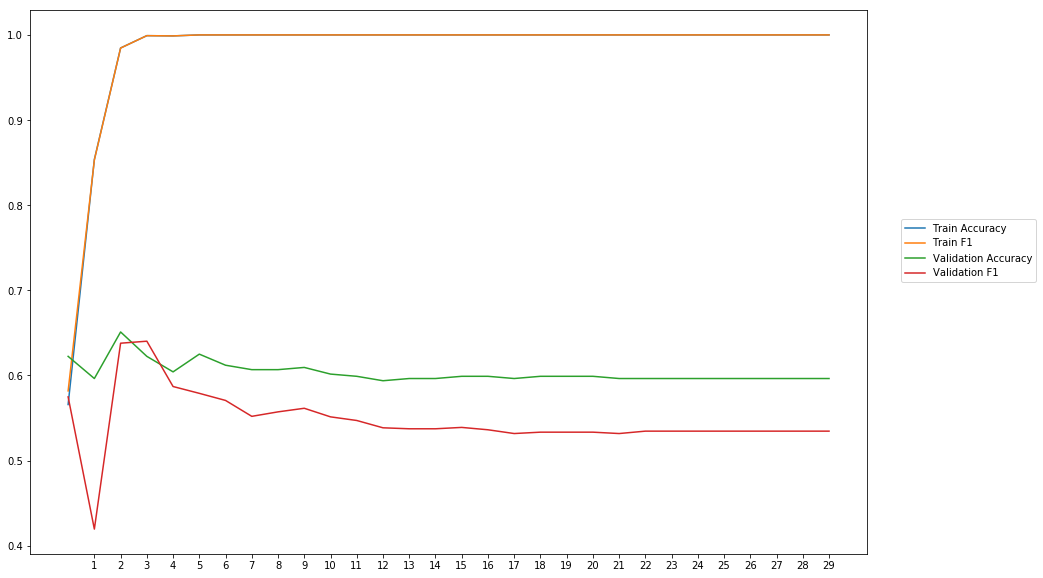

Average Accuracy: 60.34%
Average Precision: 63.38%
Average Recall: 48.52%
Average F1: 54.69%

-----Fold 3--------


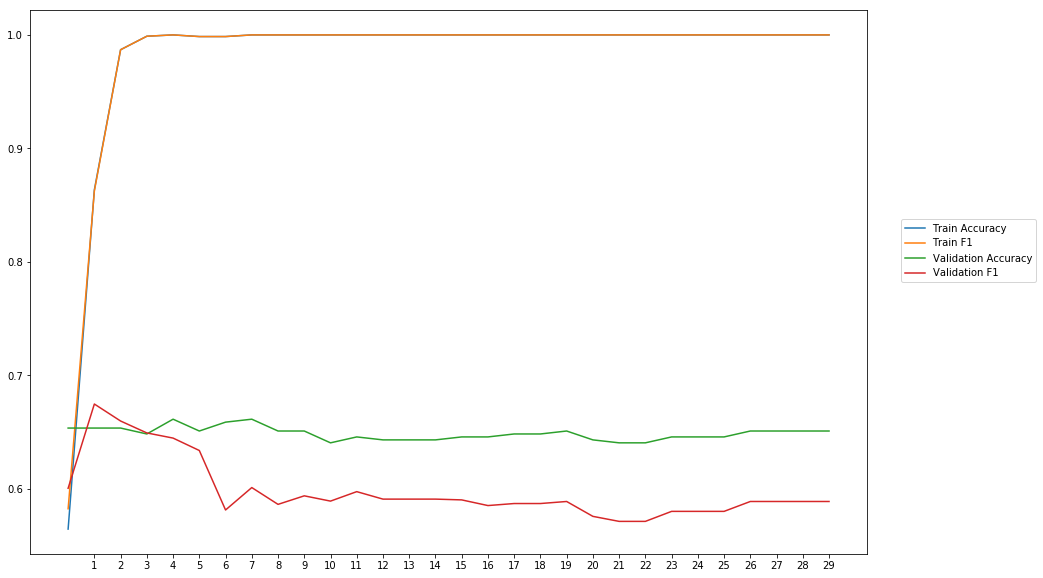

Average Accuracy: 64.89%
Average Precision: 69.60%
Average Recall: 52.88%
Average F1: 59.80%

-----Fold 4--------


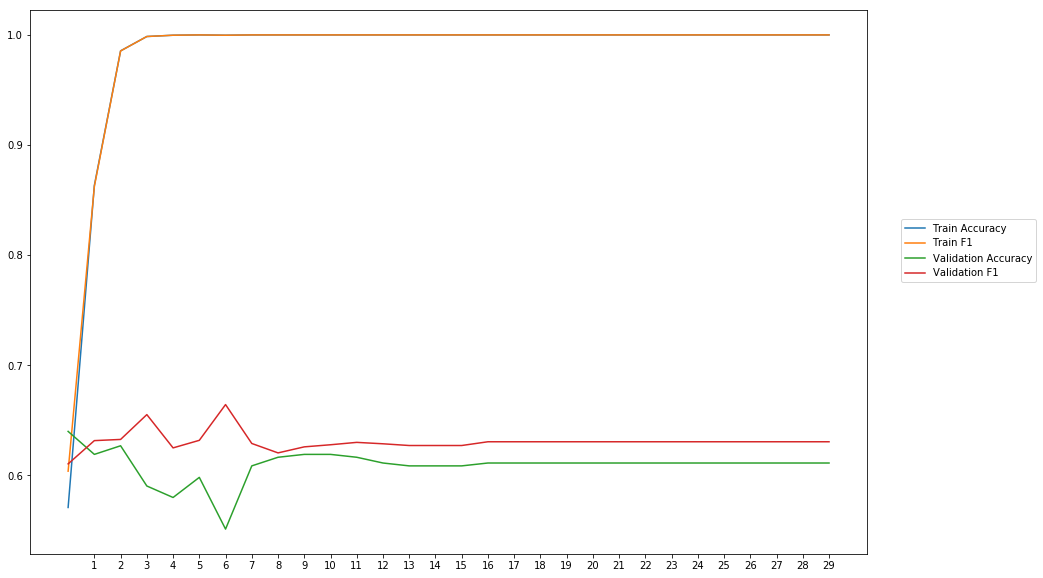

Average Accuracy: 60.91%
Average Precision: 59.84%
Average Recall: 67.02%
Average F1: 63.05%

-----Fold 5--------


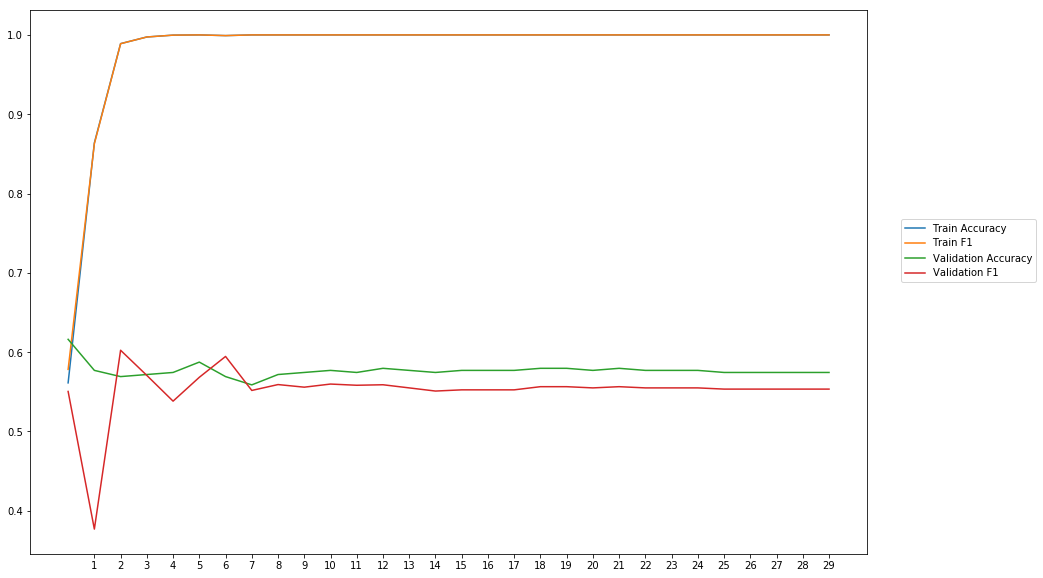

Average Accuracy: 57.68%
Average Precision: 58.73%
Average Recall: 52.77%
Average F1: 55.22%

-----Fold 6--------


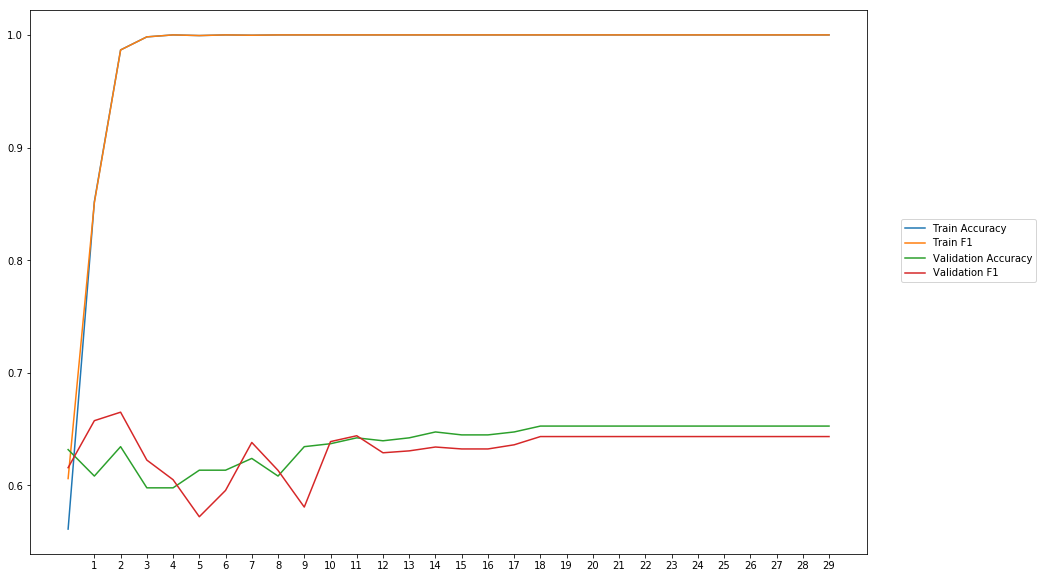

Average Accuracy: 63.81%
Average Precision: 64.25%
Average Recall: 62.51%
Average F1: 63.22%

-----Fold 7--------


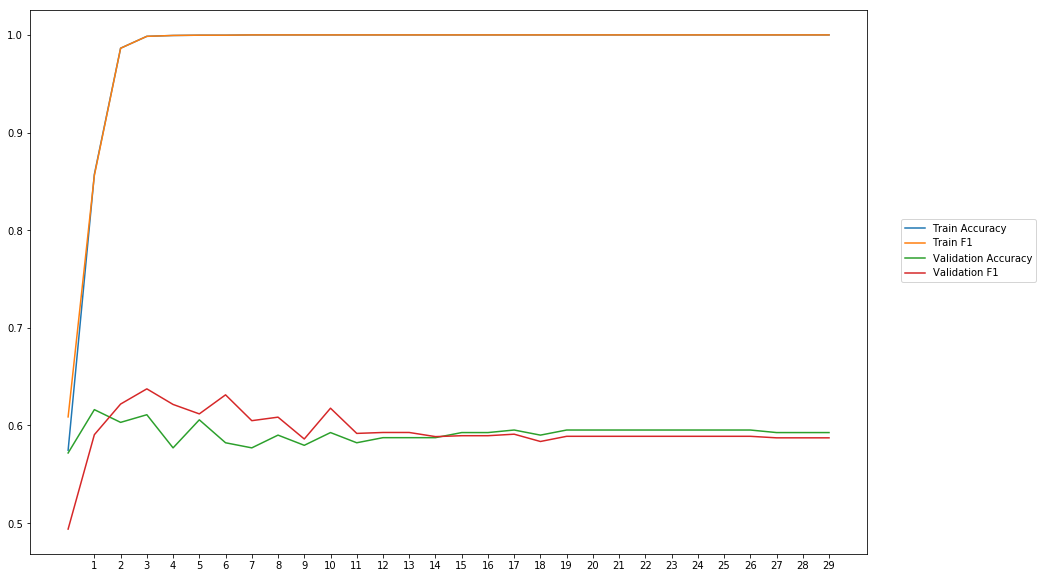

Average Accuracy: 59.21%
Average Precision: 59.02%
Average Recall: 60.09%
Average F1: 59.39%

-----Fold 8--------


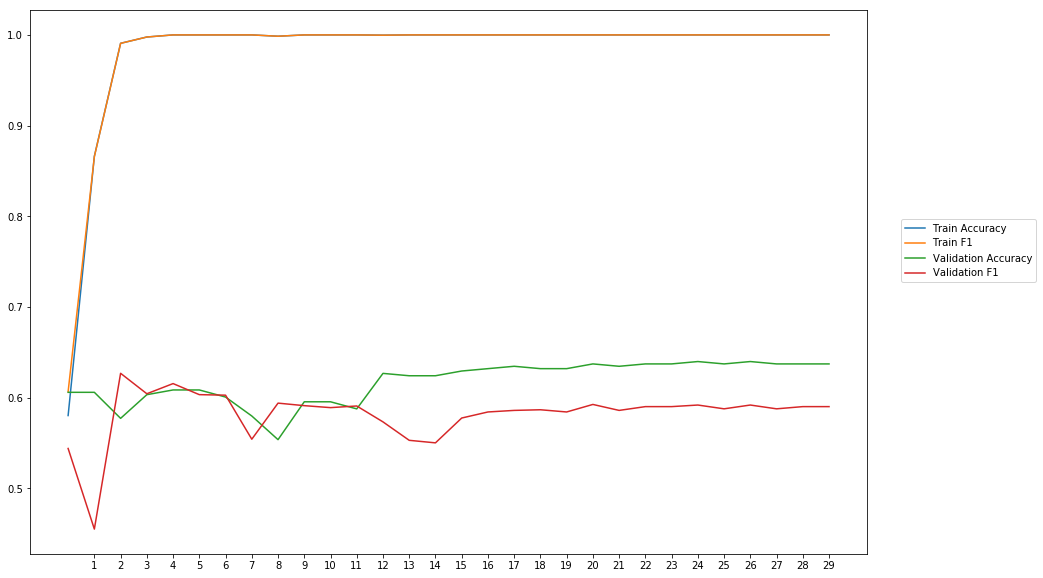

Average Accuracy: 61.76%
Average Precision: 64.66%
Average Recall: 53.79%
Average F1: 58.20%

-----Fold 9--------


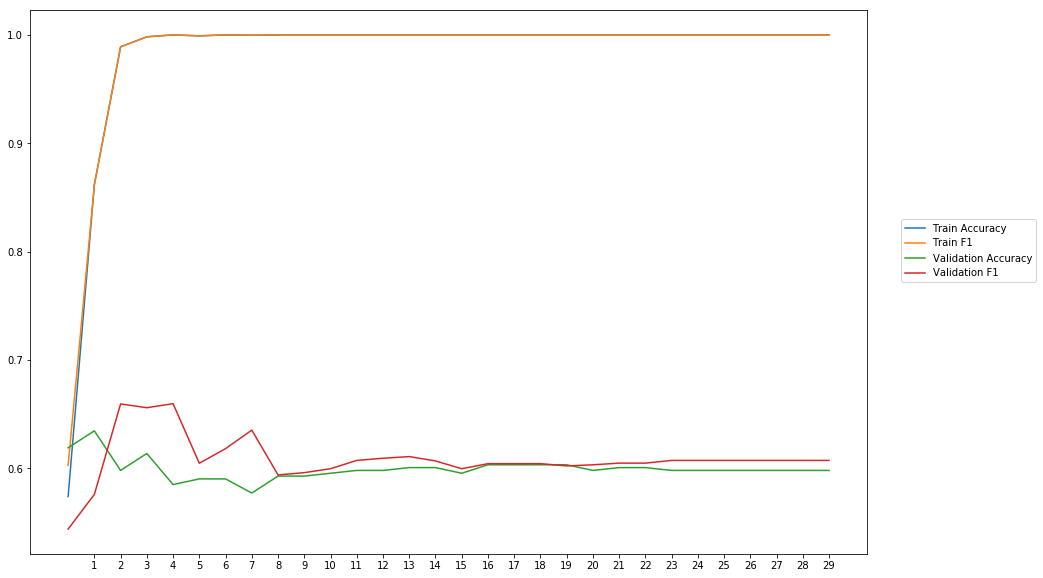

Average Accuracy: 59.92%
Average Precision: 59.56%
Average Recall: 62.81%
Average F1: 60.84%

-----Fold 10--------


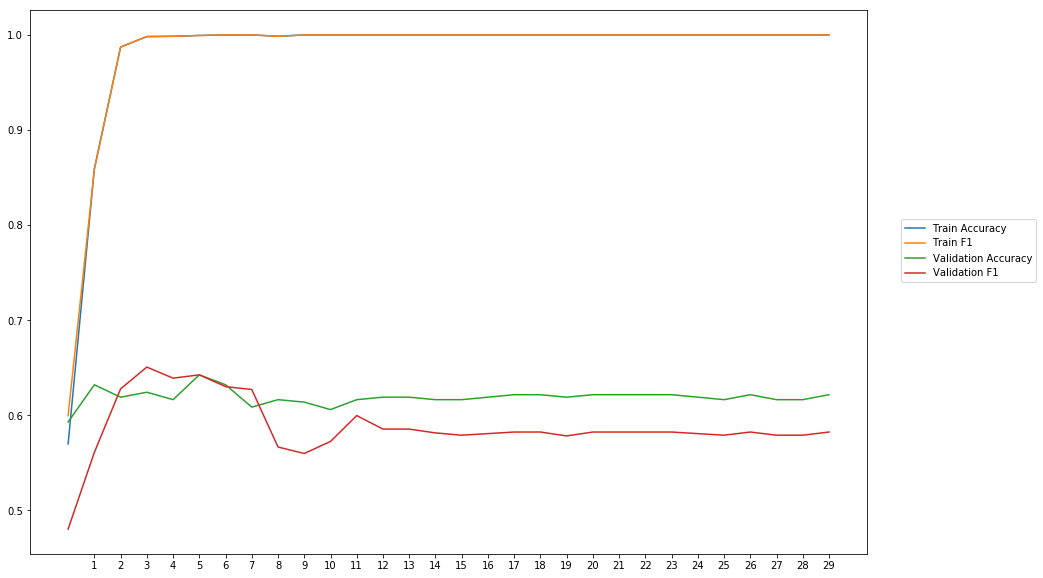

Average Accuracy: 61.88%
Average Precision: 63.91%
Average Recall: 54.82%
Average F1: 58.72%

-------Overallresults-------


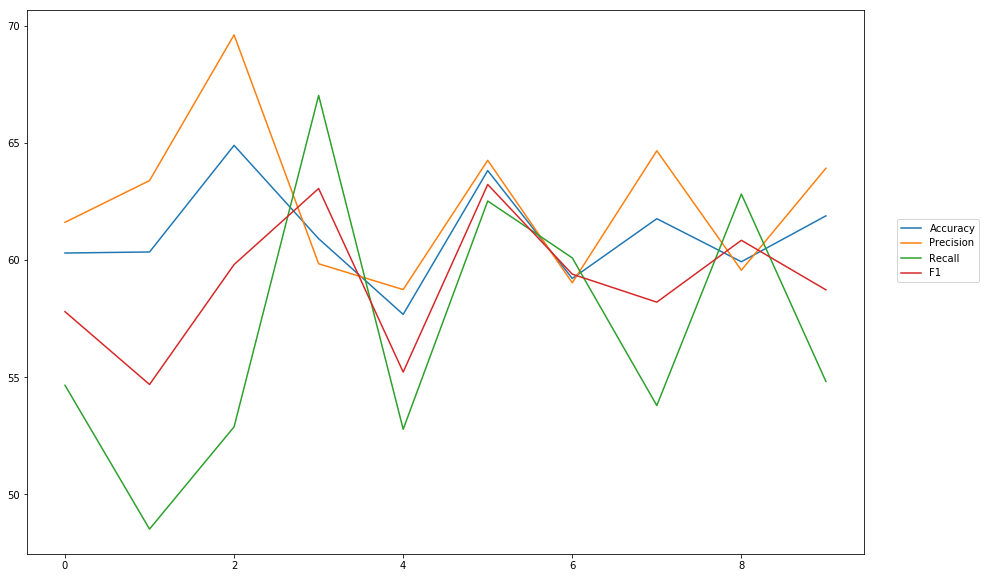

Accuracy: Mean = 61.07% (+/- 2.02%), Max = 64.89%, Min =  57.68%
Precision: Mean = 62.46% (+/- 3.22%), Max = 69.60%, Min =  58.73%
Recall: Mean = 56.99% (+/- 5.49%), Max = 67.02%, Min =  48.52%
F1: Mean = 59.09% (+/- 2.71%), Max = 63.22%, Min =  54.69%


In [31]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'combi_mlp_as_layer_cnn')  

## CNN model layer in MLP

In [32]:
#CNN model
comment_input_cnn = Input(shape=(40,600,), dtype='float32')
cnn = Conv1D(200, kernel_size =3, activation='relu')(comment_input_cnn)
cnn = MaxPooling1D(pool_size=2) (cnn)
cnn = Flatten() (cnn)
preds_cnn = Dense(2, activation = 'softmax')(cnn)

cnn_model = Model(comment_input_cnn, preds_cnn)

# MLP model
wv_layer7 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

comment_input7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences7 = wv_layer7(comment_input7)
mlp = Dense(600, activation='relu') (embedded_sequences7)
preds7 = cnn_model(mlp) 

# build the model
model7 = Model(inputs=[comment_input7], outputs=preds7)
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 40)                0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 40, 300)           4118700   
_________________________________________________________________
dense_25 (Dense)             (None, 40, 600)           180600    
_________________________________________________________________
model_18 (Model)             (None, 2)                 367802    
Total params: 4,667,102
Trainable params: 4,667,102
Non-trainable params: 0
_________________________________________________________________



-----Fold 1--------


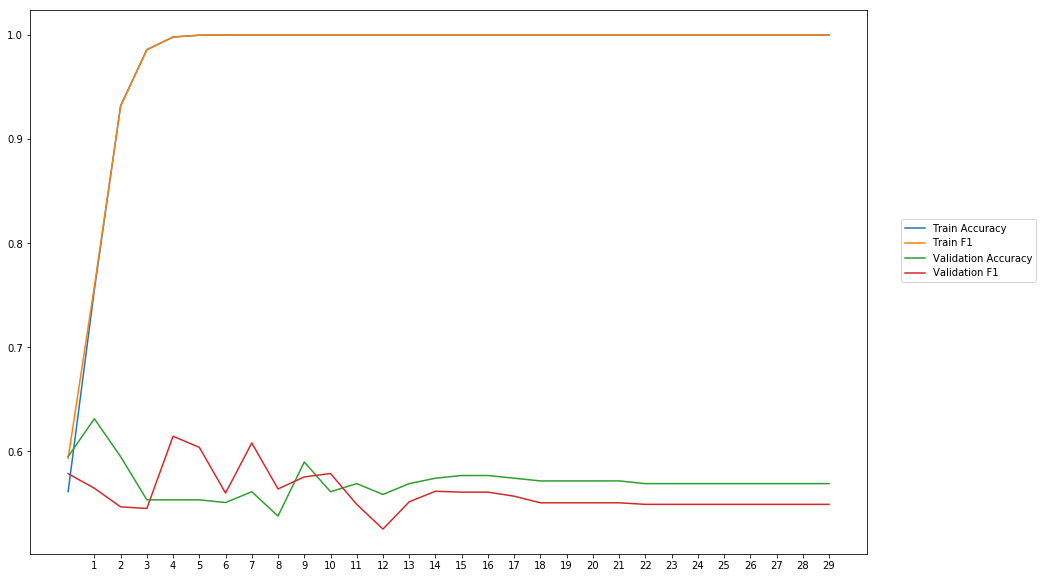

Average Accuracy: 57.05%
Average Precision: 57.49%
Average Recall: 55.00%
Average F1: 55.98%

-----Fold 2--------


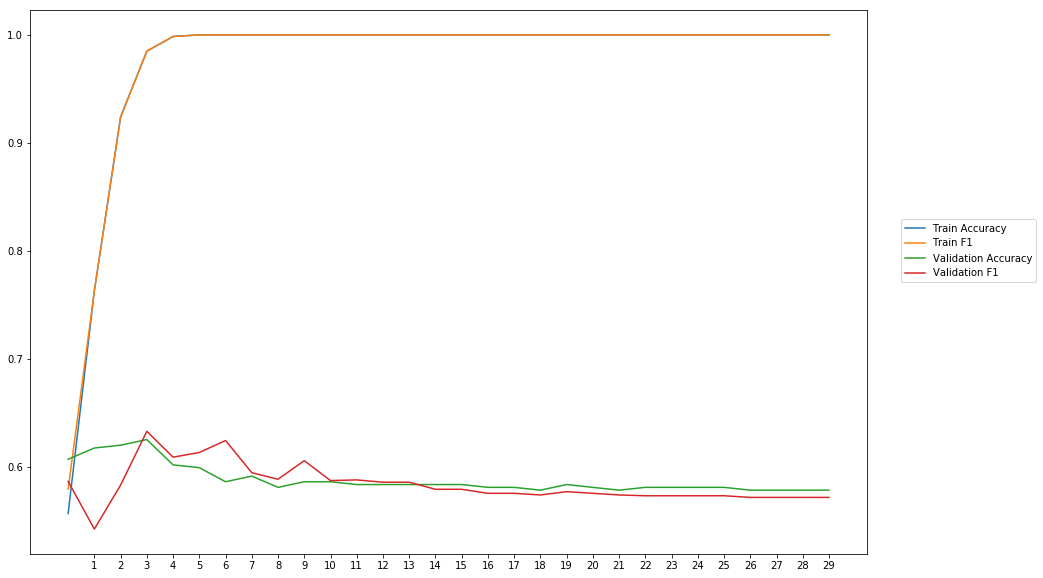

Average Accuracy: 58.78%
Average Precision: 58.75%
Average Recall: 58.22%
Average F1: 58.36%

-----Fold 3--------


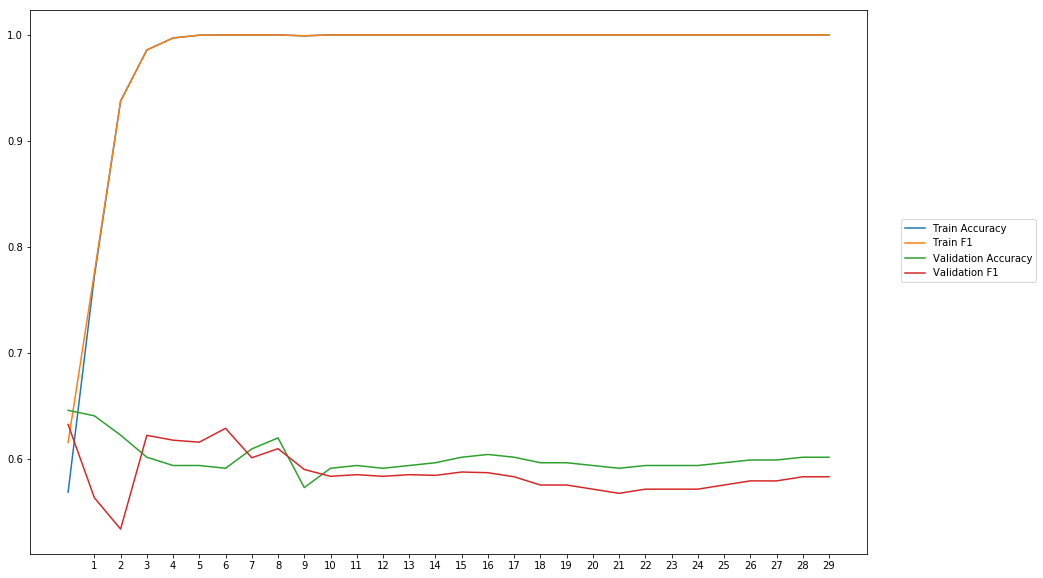

Average Accuracy: 60.07%
Average Precision: 60.72%
Average Recall: 57.19%
Average F1: 58.66%

-----Fold 4--------


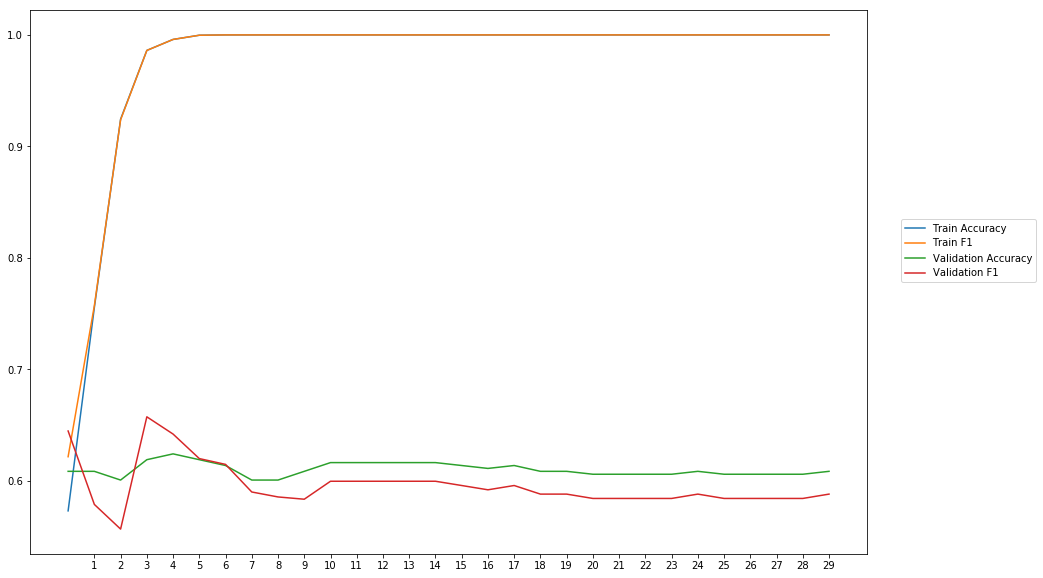

Average Accuracy: 61.00%
Average Precision: 61.67%
Average Recall: 57.87%
Average F1: 59.59%

-----Fold 5--------


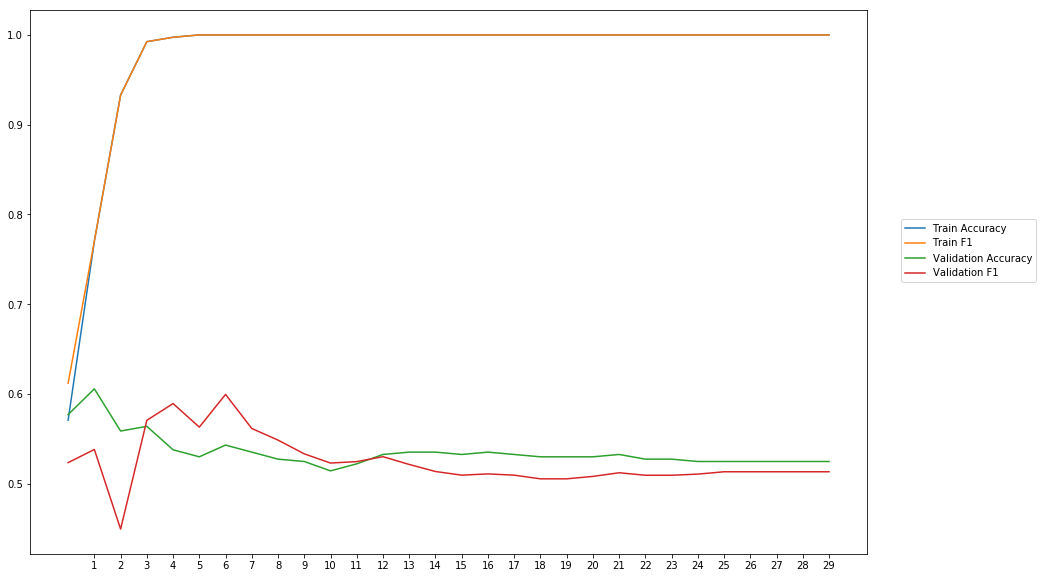

Average Accuracy: 53.57%
Average Precision: 53.80%
Average Recall: 51.78%
Average F1: 52.50%

-----Fold 6--------


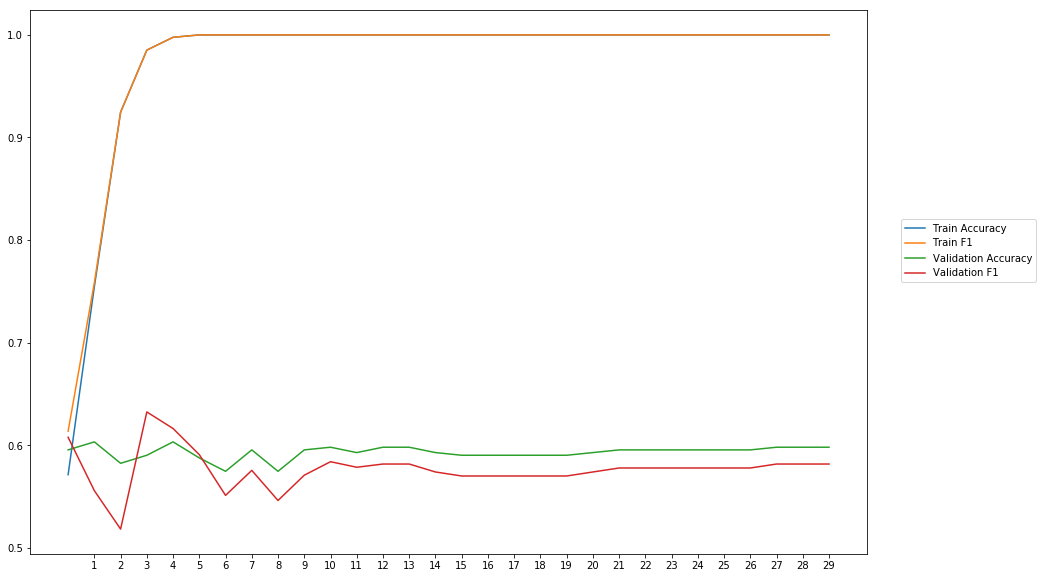

Average Accuracy: 59.30%
Average Precision: 59.93%
Average Recall: 55.74%
Average F1: 57.65%

-----Fold 7--------


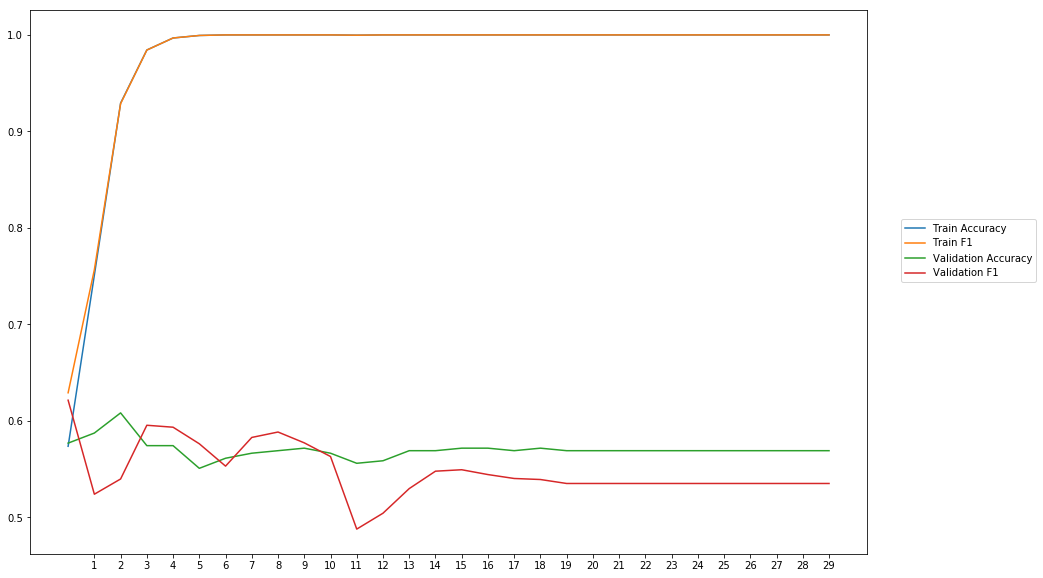

Average Accuracy: 57.02%
Average Precision: 57.73%
Average Recall: 52.65%
Average F1: 54.82%

-----Fold 8--------


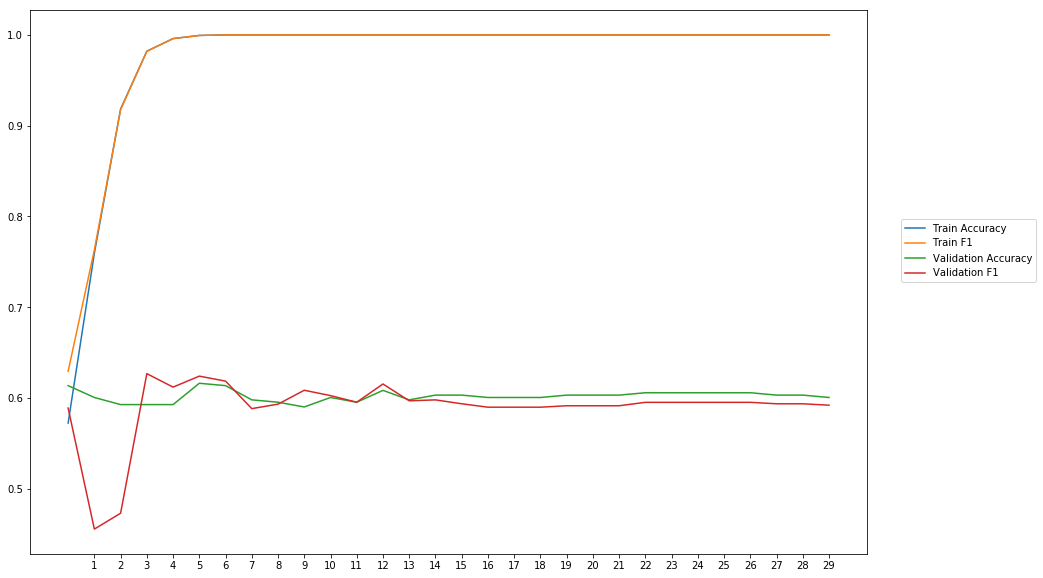

Average Accuracy: 60.20%
Average Precision: 60.89%
Average Recall: 57.89%
Average F1: 58.96%

-----Fold 9--------


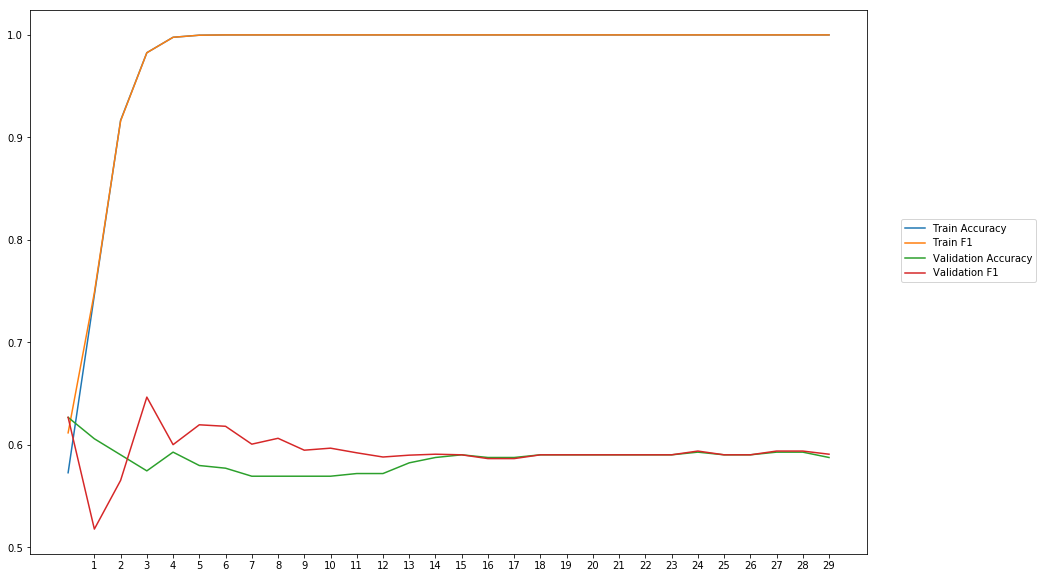

Average Accuracy: 58.62%
Average Precision: 58.36%
Average Recall: 60.86%
Average F1: 59.36%

-----Fold 10--------


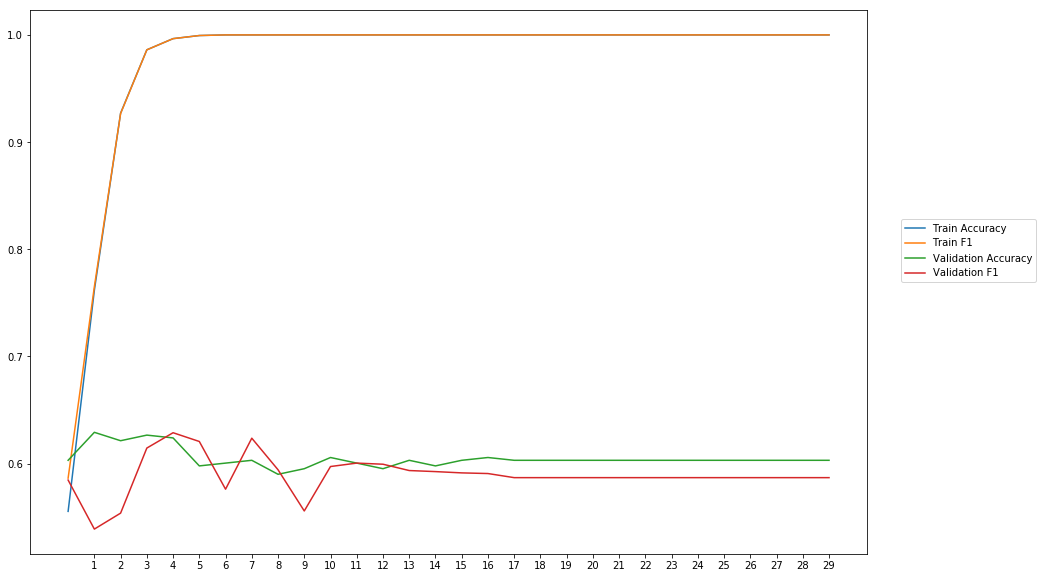

Average Accuracy: 60.48%
Average Precision: 61.31%
Average Recall: 57.12%
Average F1: 58.96%

-------Overallresults-------


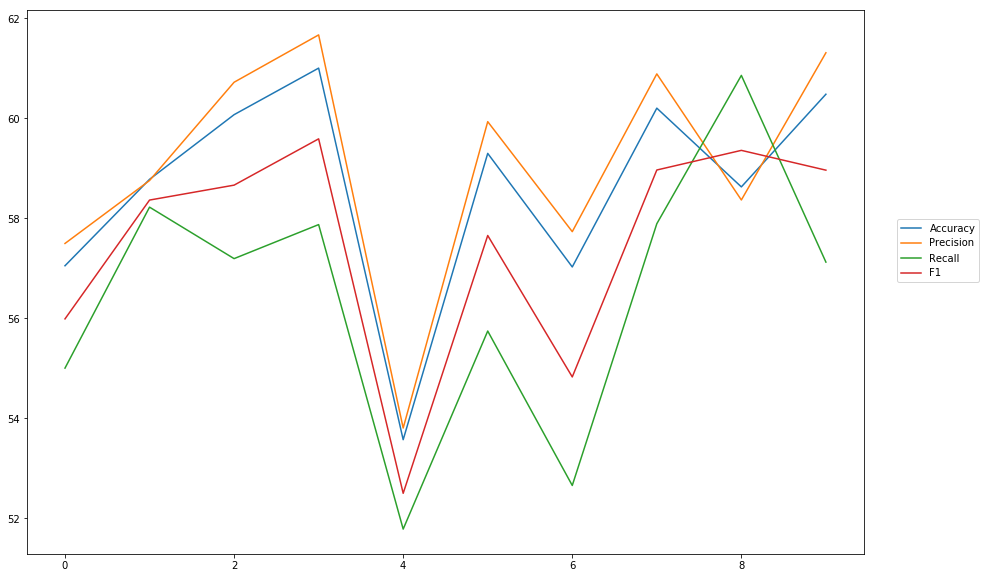

Accuracy: Mean = 58.61% (+/- 2.12%), Max = 61.00%, Min =  53.57%
Precision: Mean = 59.06% (+/- 2.26%), Max = 61.67%, Min =  53.80%
Recall: Mean = 56.43% (+/- 2.58%), Max = 60.86%, Min =  51.78%
F1: Mean = 57.48% (+/- 2.21%), Max = 59.59%, Min =  52.50%


In [33]:
cross_val(model7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'combi_cnn_as_layer_mlp')  

## Train and test the best combination with heldout testdata

Instructions for updating:
Use tf.cast instead.


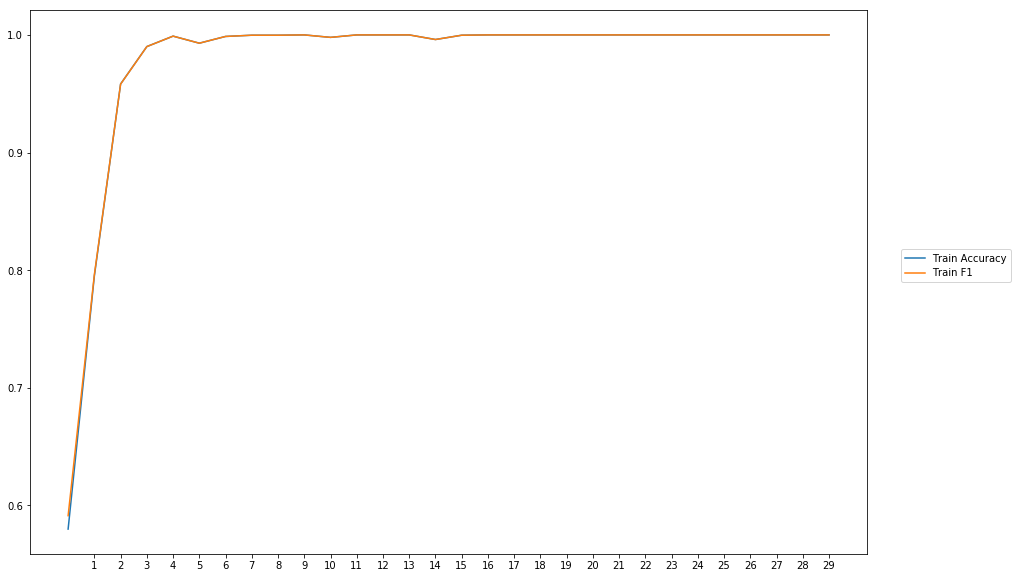


-----Test Scores----
Loss: 3.0969811313006343
Accuracy: 65.05102040816327
Precision: 55.013550120592534
Recall: 65.27331187611792
F1: 59.705877371756465


In [9]:
train_evaluate_final_model(model6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_Combi_MLP_CNN')